# Jira Board Connection

In [15]:
#! pip3 install jira
#! python3 -m pip install jira
# ! pip3 install tabulate
#! pip3 install fpdf

## --- Import Libraries ---

In [16]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np # For grouped bar chart calculations
from collections import defaultdict, Counter
from jira import JIRA
from getpass import getpass # To securely get the API token
import json
import sys # To exit gracefully on error
import seaborn as sns
from tabulate import tabulate
from datetime import date
import numpy as np
import datetime
from fpdf import FPDF # Using fpdf2 is recommended for more features (pip install fpdf2)
                     # If using original fpdf (pip install fpdf), some advanced multi_cell args might not be available
                     # but the core logic for table drawing will be similar.




## --- Read the Local Credentials Json file ---

In [17]:
# --- Configuration File Handling ---
CONFIG_FILENAME = "config.json"

def load_config(filepath=CONFIG_FILENAME):
    """
    Loads configuration data from a JSON file.

    Args:
        filepath (str): The path to the configuration file.
                        Defaults to CONFIG_FILENAME in the script's directory.

    Returns:
        dict: A dictionary containing the configuration data.
              Returns None if the file cannot be read or parsed.
    """
    config_path = os.path.join(os.getcwd(), filepath) # Look in the current working directory

    if not os.path.exists(config_path):
        print(f"Error: Configuration file not found at '{config_path}'")
        print("Please create the file with your Jira server, email, and API token.")
        return None

    try:
        with open(config_path, 'r') as f:
            config_data = json.load(f)
            # Basic validation (check if essential keys exist)
            required_keys = ["jira_server", "jira_email", "jira_api_token"]
            if not all(key in config_data for key in required_keys):
                missing = [key for key in required_keys if key not in config_data]
                print(f"Error: Configuration file '{config_path}' is missing required keys: {missing}")
                return None
            # Optional: Add more specific validation (e.g., check if token is not empty)
            if not config_data.get("jira_api_token"):
                 print(f"Error: 'jira_api_token' found in '{config_path}' but it is empty.")
                 return None

            print(f"Successfully loaded configuration from '{config_path}'")
            return config_data

    except json.JSONDecodeError as e:
        print(f"Error: Could not parse JSON in configuration file '{config_path}'.")
        print(f"Details: {e}")
        return None
    except Exception as e:
        print(f"Error: An unexpected error occurred while reading '{config_path}'.")
        print(f"Details: {e}")
        return None


In [18]:
# Load configuration at the start
config = load_config()

if config is None:
    print("Exiting due to configuration error.")
    sys.exit(1) # Exit with a non-zero code indicating an error

# Now access credentials from the loaded config dictionary
jira_server = config.get("jira_server")
jira_email = config.get("jira_email")
jira_token = config.get("jira_api_token")

# --- You can now use these variables in your Jira connection logic ---
# (Example snippet from previous code)
# from jira import JIRA

# print(f"\nConnecting to Jira at {JIRA_SERVER} using credentials from config...")
# try:
#     jira_options = {'server': JIRA_SERVER}
#     # Use the loaded credentials for basic_auth
#     jira = JIRA(options=jira_options, basic_auth=(JIRA_EMAIL, JIRA_API_TOKEN))
#     print("Successfully connected to Jira.")
#     # ... rest of your Jira interaction code ...

# except Exception as e:
#     print(f"Failed to connect to Jira: {e}")
#     sys.exit(1)

# --- Placeholder for rest of your script ---
print("\nCredentials loaded:")
#print(f"  Server: {jira_server}")
#print(f"  Email: {jira_email}")
# Avoid printing the token itself for security!
#print(f"  API Token: {'*' * len(jira_token) if jira_token else 'Not Loaded'}")

# ... (Your code to fetch issues, visualize, etc. would go here) ...

print("\nScript finished executing.")
# --- End of Configuration File Handling ---


Successfully loaded configuration from '/Users/jorge.rodriguez/Library/CloudStorage/GoogleDrive-jorge.rodriguez@audacy.com/My Drive/GitHub/Jira-1/config.json'

Credentials loaded:

Script finished executing.


## --- Validate Connection to the Jira Server ---

In [19]:
# Authentication
# Jira server URL
#jira_server = "https://xxxxxxxxxx"  # Replace with your Jira instance URL
# Authentication options
# Option 1: Using Personal Access Token (PAT) - Recommended for Jira Cloud
#jira_email = "xxxxxxxxx"  # Replace with your Jira email address
#jira_token = "xxxxxxxxx"  # Replace with your Jira API token

auth_type = "pat"

jira_options = {'server': jira_server}

try:
    if auth_type == "pat":
        jira = JIRA(options=jira_options, basic_auth=(jira_email, jira_token))
        print(f"Successfully connected to Jira at {jira_server} using Personal Access Token.")
    elif auth_type == "basic":
        jira = JIRA(options=jira_options, basic_auth=(jira_username, jira_password))
        print(f"Successfully connected to Jira at {jira_server} using Basic Authentication.")
    else:
        print("Invalid authentication type selected.")
except Exception as e:
    print(f"Error connecting to Jira or accessing boards: {e}")
        

Successfully connected to Jira at https://entercomdigitalservices.atlassian.net using Personal Access Token.


## --- Get a list of all the Jira Boards ---

In [20]:
# Get all boards
boards = jira.boards()
print("\n--- All Boards ---")
for board in boards:
    print(f"ID: {board.id}, Name: {board.name}")
print(f"\nTotal Boards Found: {len(boards)}")
# Get all projects
projects = jira.projects()
print("\n--- All Projects ---")
for project in projects:
    print(f"Key: {project.key}, Name: {project.name}")
print(f"\nTotal Projects Found: {len(projects)}")


--- All Boards ---
ID: 1052, Name: ADT Board Current 
ID: 187, Name: Product Ops (Kanban)
ID: 637, Name: DPM Planning v3
ID: 346, Name: UPMS Scrum Board
ID: 281, Name: RDC RW
ID: 343, Name: Unity Support Bugs  (WIP)
ID: 255, Name: Management Board
ID: 446, Name: Scrum Board for PMO Test Project
ID: 383, Name: EPMO Kanban Board
ID: 508, Name: Work & Co
ID: 551, Name: Ops A2 Readiness
ID: 286, Name: SAFe Feature Design Status
ID: 359, Name: INIT board
ID: 326, Name: DRAUTO KANBAN
ID: 387, Name: Lodge QAE
ID: 388, Name: On Demand Kanban Board
ID: 304, Name: MARKETOPS board
ID: 303, Name: ENGSUPPORT board
ID: 302, Name: Marconi Epics
ID: 340, Name: UMS
ID: 297, Name: UNITY Dev Velocity
ID: 174, Name: Audio Admin
ID: 322, Name: VE board
ID: 394, Name: Roc Lite
ID: 344, Name: BASS Scrum Board
ID: 402, Name: Marconi Release Prep
ID: 491, Name: Design
ID: 351, Name: Data Engineering Scrum Board
ID: 441, Name: Data Engineering Kanban
ID: 431, Name: Audio Admin Scrum Board
ID: 436, Name: Conten

In [21]:
# Key: EIT, Name: Enterprise IT
# Key: DEVOPS, Name: DevOps

## --- DevOps Projects in Jira --- 

In [22]:
# --- Accessing Projects ---

projects = jira.projects()
print("\n--- All Projects ---")
for project in projects:
    if project.key == "DEVOPS":
        print(f"Found DevOps project Key: {project.key}, Name: {project.name}, ID: {project.id}")
    #print(f"Key: {project.key}, Name: {project.name}, ID: {project.id}")
    if "DevOps" in project.name:
        print(f"Found DevOps project Key: {project.key}, Name: {project.name}, ID: {project.id}")
print(f"\nTotal Projects Found: {len(projects)}")
if "DevOps" in projects:
    print("DevOps project found!")
else:
    print("DevOps project not found.")


--- All Projects ---
Found DevOps project Key: AWDS, Name: Amperwave DevOps, ID: 13912
Found DevOps project Key: DEVOPS, Name: DevOps, ID: 13769
Found DevOps project Key: DEVOPS, Name: DevOps, ID: 13769

Total Projects Found: 153
DevOps project not found.


## --- Enterprise IT Projects in Jira ---

In [23]:
# --- Accessing Projects ---

projects = jira.projects()
print("\n--- All Projects ---")
for project in projects:
    if project.key == "EIT":
        print(f"Found Enterprise IT project Key: {project.key}, Name: {project.name}, ID: {project.id}")
    #print(f"Key: {project.key}, Name: {project.name}, ID: {project.id}")
    if "EIT" in project.name:
        print(f"Found Enterprise IT project Key: {project.key}, Name: {project.name}, ID: {project.id}")
print(f"\nTotal Projects Found: {len(projects)}")
if "EIT" in projects:
    print("Enterprise IT project found!")
else:
    print("Enterprise IT project not found.")


--- All Projects ---
Found Enterprise IT project Key: EIT, Name: Enterprise IT, ID: 13969

Total Projects Found: 153
Enterprise IT project not found.


## --- Accessing Kanban Statuses DevOps ---

In [24]:
# --- Accessing Kanban Statuses ---

project_key_to_check = "DEVOPS"  # Replace with the project key you want to check
found_project = None
for project in projects:
    if project.key == project_key_to_check:
        found_project = project
        break
boards = jira.boards(projectKeyOrID=found_project.id)  # get all boards related to the project
print(boards)
print(f"\n--- All Boards for Project '{found_project.name}' ---")
for board in boards:
    #print(board)
    print(f"ID: {board.id}, Name: {board.name}")        
print(f"\nTotal Boards Found: {len(boards)}")



[<JIRA Board: name='IT-INFRA', id=222>, <JIRA Board: name='ARCHIVED CLOUD-ENG', id=550>, <JIRA Board: name='ARCHIVED Platform Engineering Board', id=618>, <JIRA Board: name='DevOps Status Board ', id=594>]

--- All Boards for Project 'DevOps' ---
ID: 222, Name: IT-INFRA
ID: 550, Name: ARCHIVED CLOUD-ENG
ID: 618, Name: ARCHIVED Platform Engineering Board
ID: 594, Name: DevOps Status Board 

Total Boards Found: 4


## --- Accessing Kanban Statuses EIT ---

In [25]:
# --- Accessing Kanban Statuses ---

project_key_to_check = "EIT"  # Replace with the project key you want to check
found_project = None
for project in projects:
    if project.key == project_key_to_check:
        found_project = project
        break
boards = jira.boards(projectKeyOrID=found_project.id)  # get all boards related to the project
print(boards)
print(f"\n--- All Boards for Project '{found_project.name}' ---")
for board in boards:
    #print(board)
    print(f"ID: {board.id}, Name: {board.name}")        
print(f"\nTotal Boards Found: {len(boards)}")

[<JIRA Board: name='EIT Scrum Board', id=719>]

--- All Boards for Project 'Enterprise IT' ---
ID: 719, Name: EIT Scrum Board

Total Boards Found: 1


## --- Fetch Issues (Tickets) from the Project DevOPs ---

In [26]:
# --- Fetch Issues from the Project ---
PROJECT_KEY = "DEVOPS"  # Replace with your project key
#PROJECT_KEY = "EIT"  # Replace with your project key

print(f"Fetching issues for project '{PROJECT_KEY}'...")
issues_in_project = []
jql_query = f'project = "{PROJECT_KEY}" ORDER BY created DESC'

# jira-python handles pagination automatically when iterating
try:
    # Search issues iteratively (handles pagination)
    # Increase maxResults if needed, but iteration is generally preferred
    search_params = {'jql': jql_query, 'maxResults': False, 'fields': 'status'} # Fetch only status field
    issues_iterator = jira.search_issues(jql_str=search_params['jql'],
                                         maxResults=search_params['maxResults'],
                                         fields=search_params['fields'],
                                         expand=None, # No need to expand other fields
                                         json_result=False) # Get Issue objects

    # Process issues as they are fetched
    status_counts = Counter()
    print(f"Total issues found: {issues_iterator.total}")
    total_issues_processed = 0
    for issue in issues_iterator:
        #print(f"Processing issue: {issue.key}")
        status_name = issue.fields.status.name
        status_counts[status_name] += 1
        total_issues_processed += 1
        # Optional: Print progress
        if total_issues_processed % 2000 == 0:
             print(f"Processed {total_issues_processed} issues...")

    print(f"Finished fetching. Found {total_issues_processed} issues in total.")

    if not status_counts:
        print(f"No issues found for project '{PROJECT_KEY}' or couldn't retrieve statuses.")
        exit()

except Exception as e:
    print(f"An error occurred while fetching issues: {e}")
    # Check if it's an authentication error
    if "401" in str(e):
        print("Hint: Check if your JIRA_EMAIL and API Token are correct and have permissions.")
    # Check if it's a project not found error
    elif "404" in str(e) or "project" in str(e).lower():
         print(f"Hint: Check if the project key '{PROJECT_KEY}' is correct.")
    exit()


# --- Prepare Data for Visualization ---
# Remove "Done" and "Will Not Do" statuses if they exist
status_counts.pop("Done", None)
status_counts.pop("Will Not Do", None)

statuses = list(status_counts.keys())
counts = list(status_counts.values())

print("\nTicket Counts per Stage:")
for status, count in status_counts.items():
    print(f"- {status}: {count}")

print(statuses)

print("Script finished.")


Fetching issues for project 'DEVOPS'...
Total issues found: 7615
Processed 2000 issues...
Processed 4000 issues...
Processed 6000 issues...
Finished fetching. Found 7615 issues in total.

Ticket Counts per Stage:
- Triage: 1
- To Do: 48
- Tech Discovery Required: 17
- In Progress: 18
- Validating: 16
- On Hold: 10
- Blocked: 12
- Resource Constrained: 9
['Triage', 'To Do', 'Tech Discovery Required', 'In Progress', 'Validating', 'On Hold', 'Blocked', 'Resource Constrained']
Script finished.


# --- Create Visualization ---


Generating visualization...
Displaying plot. Close the plot window to exit the script.


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_1602/1269462503.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability


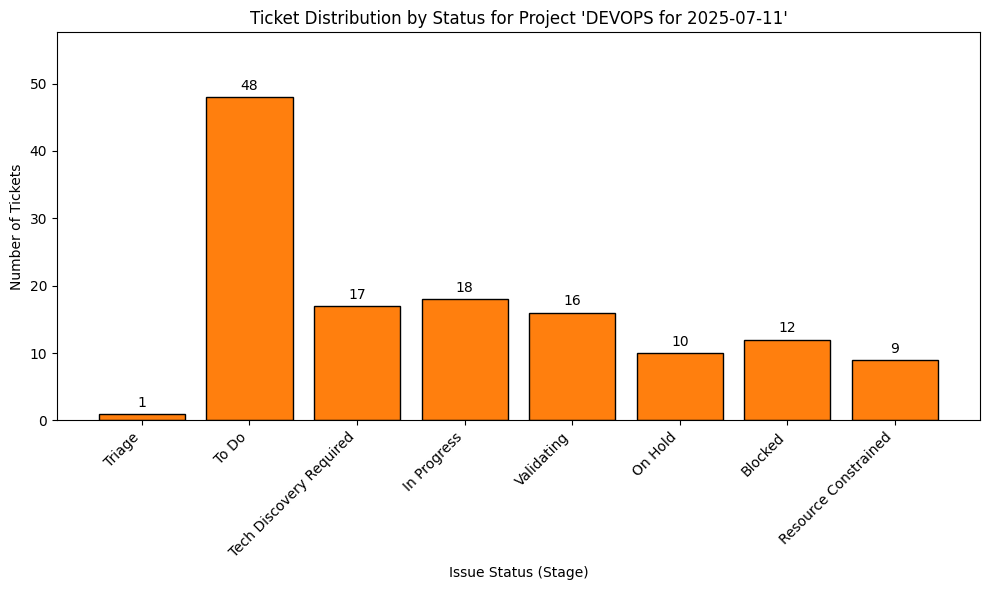

In [27]:
# --- Create Visualization ---
print("\nGenerating visualization...")
fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figure size as needed

bars = ax.bar(statuses, counts, color='C1', edgecolor='black')

# Add counts above the bars
ax.bar_label(bars, padding=3)

ax.set_xlabel("Issue Status (Stage)")
ax.set_ylabel("Number of Tickets")
ax.set_title(f"Ticket Distribution by Status for Project '{PROJECT_KEY} for {date.today()}'")
ax.set_ylim(0, max(counts) * 1.2)  # Add some space above the highest bar
#ax.tick_params(axis='x', rotation=90, ha='right') # Rotate labels if they overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping

# --- Display the Plot ---
print("Displaying plot. Close the plot window to exit the script.")
plt.show()


## --- Fetch Issues (Tickets) from the Project EIT ---

In [28]:
# --- Fetch Issues from the Project ---
PROJECT_KEY = "EIT"  # Replace with your project key
#PROJECT_KEY = "EIT"  # Replace with your project key

print(f"Fetching issues for project '{PROJECT_KEY}'...")
issues_in_project = []
jql_query = f'project = "{PROJECT_KEY}" ORDER BY created DESC'

# jira-python handles pagination automatically when iterating
try:
    # Search issues iteratively (handles pagination)
    # Increase maxResults if needed, but iteration is generally preferred
    search_params = {'jql': jql_query, 'maxResults': False, 'fields': 'status'} # Fetch only status field
    issues_iterator = jira.search_issues(jql_str=search_params['jql'],
                                         maxResults=search_params['maxResults'],
                                         fields=search_params['fields'],
                                         expand=None, # No need to expand other fields
                                         json_result=False) # Get Issue objects

    # Process issues as they are fetched
    status_counts = Counter()
    print(f"Total issues found: {issues_iterator.total}")
    total_issues_processed = 0
    for issue in issues_iterator:
        #print(f"Processing issue: {issue.key}")
        status_name = issue.fields.status.name
        status_counts[status_name] += 1
        total_issues_processed += 1
        # Optional: Print progress
        if total_issues_processed % 2000 == 0:
             print(f"Processed {total_issues_processed} issues...")

    print(f"Finished fetching. Found {total_issues_processed} issues in total.")

    if not status_counts:
        print(f"No issues found for project '{PROJECT_KEY}' or couldn't retrieve statuses.")
        exit()

except Exception as e:
    print(f"An error occurred while fetching issues: {e}")
    # Check if it's an authentication error
    if "401" in str(e):
        print("Hint: Check if your JIRA_EMAIL and API Token are correct and have permissions.")
    # Check if it's a project not found error
    elif "404" in str(e) or "project" in str(e).lower():
         print(f"Hint: Check if the project key '{PROJECT_KEY}' is correct.")
    exit()


# --- Prepare Data for Visualization ---
# Remove "Done" and "Will Not Do" statuses if they exist
status_counts.pop("Done", None)
status_counts.pop("Will Not Do", None)

statuses = list(status_counts.keys())
counts = list(status_counts.values())

print("\nTicket Counts per Stage:")
for status, count in status_counts.items():
    print(f"- {status}: {count}")

print(statuses)

print("Script finished.")


Fetching issues for project 'EIT'...
Total issues found: 338
Finished fetching. Found 338 issues in total.

Ticket Counts per Stage:
- Triage: 10
- To Do: 16
- Backlog: 28
- In Progress: 10
- Blocked For Development: 1
['Triage', 'To Do', 'Backlog', 'In Progress', 'Blocked For Development']
Script finished.


# --- Create Visualization ---


Generating visualization...
Displaying plot. Close the plot window to exit the script.


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_1602/756032795.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability


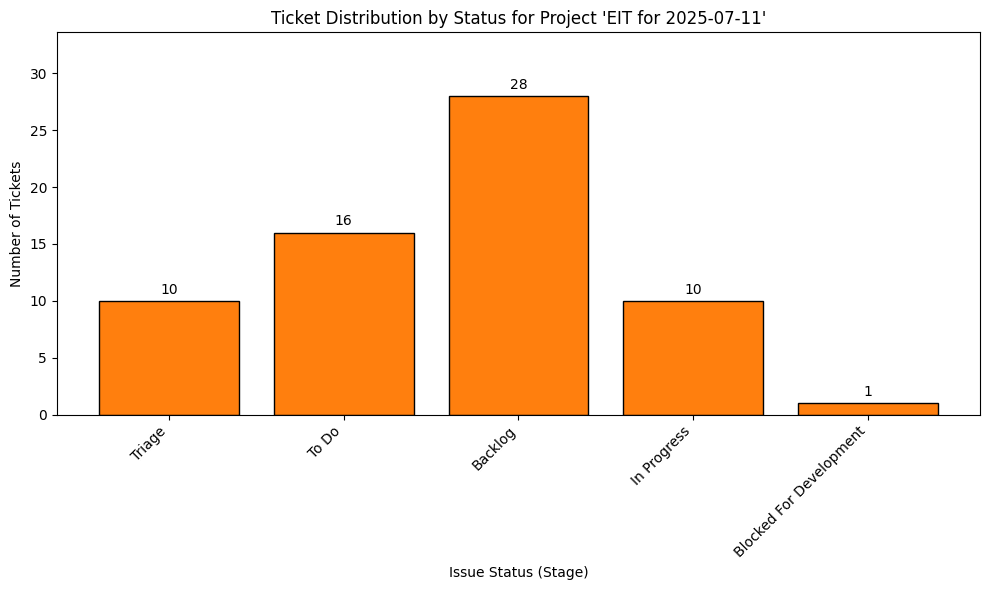

In [29]:
# --- Create Visualization ---
print("\nGenerating visualization...")
fig, ax = plt.subplots(figsize=(10, 6)) # Adjust figure size as needed

bars = ax.bar(statuses, counts, color='C1', edgecolor='black')

# Add counts above the bars
ax.bar_label(bars, padding=3)

ax.set_xlabel("Issue Status (Stage)")
ax.set_ylabel("Number of Tickets")
ax.set_title(f"Ticket Distribution by Status for Project '{PROJECT_KEY} for {date.today()}'")
ax.set_ylim(0, max(counts) * 1.2)  # Add some space above the highest bar
#ax.tick_params(axis='x', rotation=90, ha='right') # Rotate labels if they overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping

# --- Display the Plot ---
print("Displaying plot. Close the plot window to exit the script.")
plt.show()

In [30]:
# --- Example JSON Response for an Issue ---
'''
{
  "expand": "renderedFields,names,schema,operations,editmeta,changelog,versionedRepresentations",
  "id": "10001",
  "self": "https://your-jira-instance.atlassian.net/rest/api/3/issue/10001",
  "key": "PROJECT-123",
  "fields": {
    "summary": "Example Issue: Fix the login button alignment",
    "description": {
        "type": "doc",
        "version": 1,
        "content": [
            {
                "type": "paragraph",
                "content": [
                    {
                        "type": "text",
                        "text": "The login button on the main page is slightly misaligned on mobile viewports."
                    }
                ]
            }
        ]
    },
    "issuetype": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/issuetype/10000",
      "id": "10000",
      "description": "A task that needs to be done.",
      "iconUrl": "https://your-jira-instance.atlassian.net/...",
      "name": "Task",
      "subtask": false,
      "avatarId": 10318
    },
    "project": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/project/10000",
      "id": "10000",
      "key": "PROJECT",
      "name": "Example Project",
      "projectTypeKey": "software",
      "simplified": false,
      "avatarUrls": {
        "48x48": "...",
        "24x24": "...",
        "16x16": "...",
        "32x32": "..."
      }
    },
    "resolution": null, // Example: null if the issue is unresolved
    "resolutiondate": null, // Example: null if the issue is unresolved
    "created": "2023-10-27T10:05:00.123+0000",
    "updated": "2023-10-27T11:15:30.456+0000",
    "priority": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/priority/3",
      "iconUrl": "https://your-jira-instance.atlassian.net/images/icons/priorities/medium.svg",
      "name": "Medium",
      "id": "3"
    },
    "status": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/status/10001",
      "description": "The issue is currently being worked on.",
      "iconUrl": "https://your-jira-instance.atlassian.net/...",
      "name": "In Progress",
      "id": "10001",
      "statusCategory": {
        "self": "https://your-jira-instance.atlassian.net/rest/api/3/statuscategory/4",
        "id": 4,
        "key": "indeterminate",
        "colorName": "yellow",
        "name": "In Progress"
      }
    },
    "labels": [
      "ui-bug",
      "mobile"
    ],
    "assignee": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/user?accountId=...",
      "accountId": "...",
      "emailAddress": "developer@example.com",
      "avatarUrls": { ... },
      "displayName": "Jane Developer",
      "active": true,
      "timeZone": "America/Los_Angeles"
    },
    "reporter": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/user?accountId=...",
      "accountId": "...",
      "emailAddress": "reporter@example.com",
      "avatarUrls": { ... },
      "displayName": "Bob Reporter",
      "active": true,
      "timeZone": "Europe/London"
    },
    "creator": {
      "self": "https://your-jira-instance.atlassian.net/rest/api/3/user?accountId=...",
      "accountId": "...",
      "emailAddress": "reporter@example.com", // Often the same as reporter, but not always
      "avatarUrls": { ... },
      "displayName": "Bob Reporter",
      "active": true,
      "timeZone": "Europe/London"
    },
    "components": [
      {
        "self": "https://your-jira-instance.atlassian.net/rest/api/3/component/10000",
        "id": "10000",
        "name": "User Interface",
        "description": "Handles the frontend display"
      }
    ],
    "fixVersions": [
       {
        "self": "https://your-jira-instance.atlassian.net/rest/api/3/version/10001",
        "id": "10001",
        "description": "Release for Q4 features",
        "name": "Version 2.1",
        "archived": false,
        "released": false,
        "releaseDate": "2023-12-15"
      }
    ],
    "environment": "Production - Mobile Web (iOS Safari)",
    "duedate": "2023-11-10",
    "votes": {
      "self": "...",
      "votes": 5,
      "hasVoted": false
    },
    "watches": {
      "self": "...",
      "watchCount": 3,
      "isWatching": true
    },
    "workratio": -1, // Or a calculated value if time tracking is used
    "timespent": 7200, // Example: in seconds (2 hours)
    "timeoriginalestimate": 14400, // Example: in seconds (4 hours)
    "aggregatetimespent": 7200,
    "aggregatetimeoriginalestimate": 14400,
    "security": null, // Or an object if security level is set
    "versions": [], // Affected versions
    // --- Custom Fields ---
    // Custom fields vary greatly. They are identified by 'customfield_xxxxx'
    "customfield_10010": "Some text value", // Example: Text Field (single line)
    "customfield_10011": { // Example: Select List (single choice)
        "self": "...",
        "value": "Option B",
        "id": "10021"
    },
    "customfield_10012": [ // Example: Select List (multiple choices)
        { "self": "...", "value": "Alpha", "id": "10030" },
        { "self": "...", "value": "Gamma", "id": "10032" }
    ],
    "customfield_10013": 123.45, // Example: Number Field
    "customfield_10014": "2023-11-01", // Example: Date Picker
    "customfield_10015": "2023-10-27T14:30:00.000+0000", // Example: Date Time Picker
    "customfield_10016": { // Example: User Picker (single user)
        "self": "...",
        "accountId": "...",
        "displayName": "Alice QA",
        "active": true
        // ... other user details
    },
    "customfield_10017": null // Example: A custom field that hasn't been set
    // ... potentially many more custom fields ...
  }
}
# --- Example JSON Response for an Issue ---
# This is a simplified example. The actual response will contain more fields and nested structures.
'''

'\n{\n  "expand": "renderedFields,names,schema,operations,editmeta,changelog,versionedRepresentations",\n  "id": "10001",\n  "self": "https://your-jira-instance.atlassian.net/rest/api/3/issue/10001",\n  "key": "PROJECT-123",\n  "fields": {\n    "summary": "Example Issue: Fix the login button alignment",\n    "description": {\n        "type": "doc",\n        "version": 1,\n        "content": [\n            {\n                "type": "paragraph",\n                "content": [\n                    {\n                        "type": "text",\n                        "text": "The login button on the main page is slightly misaligned on mobile viewports."\n                    }\n                ]\n            }\n        ]\n    },\n    "issuetype": {\n      "self": "https://your-jira-instance.atlassian.net/rest/api/3/issuetype/10000",\n      "id": "10000",\n      "description": "A task that needs to be done.",\n      "iconUrl": "https://your-jira-instance.atlassian.net/...",\n      "name": "Tas

## --- Define JQL Query ---
### --- Fetch issues, including assignee, key, and summary fields ---

In [31]:
# --- Define JQL Query ---
'''
CF_BUSINESS_LEAD    = "customfield_11751"
CF_PLANNING_RANK    = "customfield_11445"
CF_PORTFOLIO_RANK   = "customfield_11312"
CF_PARENT_LINK      = "customfield_10300"   # Legend link lives here
CF_EPIC_LINK        = "customfield_10009"   # Story  Epic
CF_EPIC_NAME        = "customfield_10008"   # Epic Name (text)
CF_REQUEST_TYPE     = "customfield_10977"
CF_TARGET_END       = "customfield_10947"
CF_TIME_IN_PROGRESS = "customfield_11261"
'''

# Fetch issues, including assignee, key, and summary fields
PROJECT_KEY = "DEVOPS"  # Replace with your project key
PROJECT_KEY_2 = "EIT"  # Replace with your project key
PROJECT_KEY_3 = "CAR"  # Replace with your project key


fields_to_fetch = "assignee, summary, key, status, created, updated, issuetype, creator, project, duedate, priority, customfield_10947, customfield_11751,customfield_11445,customfield_11312" # Fields to fetch

# Start with a base JQL query
jql_clauses = []
if PROJECT_KEY:
    jql_clauses.append(f'project = "{PROJECT_KEY}" OR project = "{PROJECT_KEY_2}" OR project = "{PROJECT_KEY_3}"')  # Handle case sensitivity
    print(f"Fetching issues for project '{PROJECT_KEY}', {PROJECT_KEY_2}, {PROJECT_KEY_3}...")
else:
    # Warning: Fetching all issues without a project filter can be very slow
    # and return a huge number of results depending on your Jira instance size
    # and permissions. Consider adding other filters (e.g., status, updatedDate).
    print("Warning: Fetching issues across all accessible projects. This might take a while.")
    # Example: Add a filter for only assigned issues if searching all projects
    # jql_clauses.append("assignee is not EMPTY")

# Combine clauses and add ordering
jql_query = " AND ".join(jql_clauses) if jql_clauses else "" # Handle case with no clauses
jql_query += " ORDER BY assignee ASC, updated DESC"
jql_query = jql_query.strip() # Remove leading/trailing whitespace if needed

print(f"Using JQL: {jql_query if jql_query else 'Searching all issues (no specific JQL)'}")


# --- Fetch and Group Issues by Assignee ---
# Use defaultdict to easily group issues; value is a list of issue details
issues_by_assignee = defaultdict(list)

try:
    search_params = {'jql': jql_query, 'maxResults': False, 'fields': fields_to_fetch}
    issues_iterator = jira.search_issues(jql_str=search_params['jql'],
                                         maxResults=search_params['maxResults'],
                                         fields=search_params['fields'],
                                         expand=None,
                                         json_result=False) # Get Issue objects

    total_issues_processed = 0
    print("Processing issues...")
    for issue in issues_iterator:
        assignee = issue.fields.assignee
        # Use display name if available, otherwise account ID, or 'Unassigned'
        assignee_name = "Unassigned"
        if assignee:
             # Use displayName if available, fallback to name/key/email
             assignee_name = getattr(assignee, 'displayName', getattr(assignee, 'name', getattr(assignee, 'key', getattr(assignee, 'emailAddress', 'Unknown Assignee'))))

        # Store relevant issue info (e.g., key and summary)
        issue_info = {
            "key": issue.key,
            "summary": issue.fields.summary
        }
        issues_by_assignee[assignee_name].append(issue_info)

        total_issues_processed += 1
        if total_issues_processed % 2000 == 0:
             print(f"Processed {total_issues_processed} issues...")

    print(f"Finished processing. Found {total_issues_processed} issues in total.")

    if not issues_by_assignee:
        print("No issues found matching the criteria.")
        exit()

except Exception as e:
    print(f"An error occurred while fetching issues: {e}")
    if "401" in str(e):
        print("Hint: Check JIRA_EMAIL/API Token.")
    elif "400" in str(e) and "JQL" in str(e):
         print(f"Hint: Check if the JQL query is valid: {jql_query}")
    elif PROJECT_KEY and ("404" in str(e) or "project" in str(e).lower()):
         print(f"Hint: Check Project Key '{PROJECT_KEY}'.")
    exit()


print("\nScript finished.")




Fetching issues for project 'DEVOPS', EIT, CAR...
Using JQL: project = "DEVOPS" OR project = "EIT" OR project = "CAR" ORDER BY assignee ASC, updated DESC
Processing issues...
Processed 2000 issues...
Processed 4000 issues...
Processed 6000 issues...
Processed 8000 issues...
Processed 10000 issues...
Finished processing. Found 10723 issues in total.

Script finished.


## Building a Pandas Dataframe 

In [32]:
# --- Process Issues into a List of Dictionaries for DataFrame ---
def process_issues_for_dataframe(issues_json_list):
    """Transforms the raw Jira issue JSON list into a list of flat dictionaries."""
    processed_data = []
    for issue in issues_json_list:
        fields = issue.get('fields', {})
        # Use .get() with default values (like None or 'N/A') for safety
        issue_data = {
            'key': issue.get('key'),
            'id': issue.get('id'),
            'summary': fields.get('summary'),
            'status': fields.get('status', {}).get('name'),
            'issuetype': fields.get('issuetype', {}).get('name'),
            'creator_name': fields.get('creator', {}).get('displayName'),
            'creator_email': fields.get('creator', {}).get('emailAddress'),
            'reporter_name': fields.get('reporter', {}).get('displayName'),
            'reporter_email': fields.get('reporter', {}).get('emailAddress'),
            'assignee_name': fields.get('assignee', {}).get('displayName'), # Assignee can be null
            'assignee_email': fields.get('assignee', {}).get('emailAddress'),
            'created': fields.get('created'),
            'updated': fields.get('updated'),
            'priority': fields.get('priority', {}).get('name'),
            'labels': ", ".join(fields.get('labels', [])), # Join list into a string
             # Extract component names, join into a string
            'components': ", ".join([comp.get('name', '') for comp in fields.get('components', [])]),
             # Extract fix version names, join into a string
            'fix_versions': ", ".join([ver.get('name', '') for ver in fields.get('fixVersions', [])])
            # Add more fields as needed, including custom fields
            # 'customfield_xxxxx': fields.get('customfield_xxxxx')
        }
        processed_data.append(issue_data)
    return processed_data

In [33]:
print(f"Start fetching: {PROJECT_KEY}, {PROJECT_KEY_2}, {PROJECT_KEY_3} issues...")
assignee_counts = Counter()
issue_creator_counts = Counter()
status_counts = Counter()
issue_type_counts = Counter()
topic_issues_counts = Counter()
topic_issues_counts_days = 0
processed_data = []
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')

for issue in issues_iterator:
    #print(f'created {issue.fields.created}')
    if issue.fields.creator:
        creator_name = issue.fields.creator.displayName
        #creator_email = issue.fields.creator.emailAddress
    else:
        creator_name = 'Unknown'
        #creator_email = 'Unknown'

    if issue.fields.assignee:
        assignee_name = issue.fields.assignee.displayName
        #assignee_email = issue.fields.assignee.emailAddress
    else:
        assignee_name = 'Unassigned'
        #assignee_email = 'Unassigned'

    if issue.fields.priority:
        priority_name = issue.fields.priority.name
        priority_id = issue.fields.priority.id
    else:
        priority_name = 'No Priority'
        priority_id = 'No Priority'

    if issue.fields.duedate:
        due_date = issue.fields.duedate
    else:
        due_date = '2000-01-01T00:00:00.000+0000'  # Default date if not set
    try:
        if issue.fields.customfield_11751:
            bussiness_lead = str(issue.fields.customfield_11751.displayName).replace('.', ' ')
    except Exception as e   :
        bussiness_lead = 'Unknown'
    try:
        if issue.fields.customfield_11445:
            planning_rank = issue.fields.customfield_11445
    except Exception as e:
        planning_rank = 'Unknown'
    
    try:
        if issue.fields.customfield_11312:
            portfolio_rank = issue.fields.customfield_11312
    except Exception as e:
            portfolio_rank = pd.NaT  # Use NaT for missing dates

    issue_data = {
        'key': issue.key,
        'id': issue.id,
        'summary': issue.fields.summary,
        'status': issue.fields.status.name,
        'issuetype': issue.fields.issuetype.name,
        'creator_name': creator_name,
        #'creator_email': creator_email,
        #'reporter_name': issue.fields.reporter.displayName if issue.fields.reporter else 'Unknown',
        #'reporter_email': {issue.fields.reporter.emailAddress if issue.fields.reporter else 'Unknown'},
        'assignee_name': assignee_name,
        #'assignee_email': assignee_email,
        'created': pd.to_datetime(issue.fields.created,errors='coerce'),
        'updated': pd.to_datetime(issue.fields.updated,errors='coerce'),
        'project_name': issue.fields.project.name,
        'project_id': issue.fields.project.id,
        'priority_name': priority_name,
        'priority_id': priority_id,
        'project_due_date' : pd.to_datetime(due_date, utc=True, errors='coerce').tz_convert('UTC-06:00'),
        'issue_url' : issue.permalink(),
        'today' : pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00'),
        'days_old' : (pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00') - pd.to_datetime(issue.fields.created,errors='coerce')).days,
        'year_updated' : pd.to_datetime(issue.fields.updated,errors='coerce').year,
        'month_updated' : pd.to_datetime(issue.fields.updated,errors='coerce').month,
        'year_created' : pd.to_datetime(issue.fields.created,errors='coerce').year,
        'month_created' : pd.to_datetime(issue.fields.created,errors='coerce').month,
        'last_updated_days' : (pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00') - pd.to_datetime(issue.fields.updated,errors='coerce')).days,
        'project_due_date' : pd.to_datetime(due_date, utc=True, errors='coerce').tz_convert('UTC-06:00'),
        'project_due_date_days' : (pd.to_datetime(due_date, utc=True, errors='coerce').tz_convert('UTC-06:00') - pd.to_datetime(issue.fields.updated,errors='coerce')).days,
        'velocity' : (pd.to_datetime(issue.fields.updated,errors='coerce') - pd.to_datetime(issue.fields.created,errors='coerce')).days,
        'velocity_hours' : (pd.to_datetime(issue.fields.updated,errors='coerce') - pd.to_datetime(issue.fields.created,errors='coerce')).total_seconds() / 3600,
        'velocity_days' : (pd.to_datetime(issue.fields.updated,errors='coerce') - pd.to_datetime(issue.fields.created,errors='coerce')).days,
        'target_end_date' : pd.to_datetime(issue.fields.customfield_10947, utc=True, errors='coerce'),
        'bussiness_lead' : bussiness_lead,
        'planning_rank' : planning_rank,
        'portfolio_rank' : portfolio_rank,
        #'target_end_days' : (pd.to_datetime(issue.fields.customfield_10947, utc=True, errors='coerce').tz_convert('UTC-06:00') - pd.to_datetime(issue.fields.updated,errors='coerce')).days,

        # Add more fields as needed, including custom fields
        # 'customfield_xxxxx': fields.get('customfield_xxxxx')
    }
    processed_data.append(issue_data)


    if issue.fields.assignee:
        assignee_counts[issue.fields.assignee.displayName] += 1
    else:
        assignee_counts['Unassigned'] += 1

    issue_type_counts[issue.fields.issuetype.name] += 1
    status_counts[issue.fields.status.name] += 1
    issue_creator_counts[issue.fields.creator.displayName] += 1



df_issues = pd.DataFrame(processed_data)

# Calculate days until due date
df_issues.loc[(df_issues['last_updated_days'] < 0, 'last_updated_days')] = 0




print(f"Finished fetching. Found {total_issues_processed} issues in total.")
print("\nScript finished.")

Start fetching: DEVOPS, EIT, CAR issues...
Finished fetching. Found 10723 issues in total.

Script finished.


In [34]:
str(today.date())

'2025-07-11'

## Save the CSV File

In [35]:
df_issues.to_csv('jira_issues_total_'+str(today.date())+'.csv', index=False)

In [36]:
len(processed_data)

10723

### --- Getting Record 0 to validate it ---

In [37]:
processed_data[0]

{'key': 'CAR-235',
 'id': '63368',
 'summary': 'Add user "Blair Askey" to all frequency Sites as Webmaster',
 'status': 'Released Successfully to Production',
 'issuetype': 'Change and Release',
 'creator_name': 'Aaron Schultheis',
 'assignee_name': 'Aaron Schultheis',
 'created': Timestamp('2020-10-05 15:04:14.595000-0600', tz='UTC-06:00'),
 'updated': Timestamp('2020-11-30 10:58:39.586000-0700', tz='UTC-07:00'),
 'project_name': 'Release Management',
 'project_id': '13836',
 'priority_name': 'None',
 'priority_id': '10004',
 'project_due_date': Timestamp('1999-12-31 18:00:00-0600', tz='UTC-06:00'),
 'issue_url': 'https://entercomdigitalservices.atlassian.net/browse/CAR-235',
 'today': Timestamp('2025-07-11 05:46:32.505904-0600', tz='UTC-06:00'),
 'days_old': 1739,
 'year_updated': 2020,
 'month_updated': 11,
 'year_created': 2020,
 'month_created': 10,
 'last_updated_days': 1683,
 'project_due_date_days': -7640,
 'velocity': 55,
 'velocity_hours': 1340.9069419444445,
 'velocity_days'

In [38]:
df_issues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10723 entries, 0 to 10722
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   key                    10723 non-null  object                   
 1   id                     10723 non-null  object                   
 2   summary                10723 non-null  object                   
 3   status                 10723 non-null  object                   
 4   issuetype              10723 non-null  object                   
 5   creator_name           10723 non-null  object                   
 6   assignee_name          10723 non-null  object                   
 7   created                10723 non-null  object                   
 8   updated                10723 non-null  object                   
 9   project_name           10723 non-null  object                   
 10  project_id             10723 non-null  object 

In [39]:
df_issues.iloc[0]

key                                                                CAR-235
id                                                                   63368
summary                  Add user "Blair Askey" to all frequency Sites ...
status                                 Released Successfully to Production
issuetype                                               Change and Release
creator_name                                              Aaron Schultheis
assignee_name                                             Aaron Schultheis
created                                   2020-10-05 15:04:14.595000-06:00
updated                                   2020-11-30 10:58:39.586000-07:00
project_name                                            Release Management
project_id                                                           13836
priority_name                                                         None
priority_id                                                          10004
project_due_date         

In [40]:
df_issues['status'].unique()

array(['Released Successfully to Production', 'Backlog', 'Triage', 'Done',
       'In Progress', 'Will Not Do', 'Resource Constrained',
       'Tech Discovery Required', 'Validating', 'To Do', 'On Hold',
       '❌ Rolled Back', 'Post Implementation Review', 'Prepare Release',
       'Plan Release', 'Blocked', 'Review Release Plan',
       'Test and Validate', 'Blocked For Development'], dtype=object)

In [41]:
df_issues[(df_issues['status'] == 'In Progress') & (df_issues['days_old'] <= 300)]['days_old'].describe()

count     28.000000
mean      46.750000
std       55.497497
min        0.000000
25%       14.500000
50%       26.500000
75%       53.000000
max      231.000000
Name: days_old, dtype: float64

## Tickets that do NOT have a Created Date

In [42]:
#df_issues[(df_issues['days_old'] == df_issues['days_old'].max()) & (df_issues['status'] == 'In Progress')][['key','summary','status','assignee_name','created','days_old','creator_name','updated']]#

In [43]:
#df_issues[df_issues['project_name'] == 'DevOps']['assignee_name'].unique()

# -- Cleanig the Data to get ONLY CAR Tickets for the DevOps Team --

In [44]:
DEVOPS_TEAM = ['Adam Shero', 'Angel Cancio', 'Bolanle','Cullen Philippson','David Caballero','David Caballero Miranda','Juan Reyes','Mike Admire','Randall Puterbaugh','satish kumar marana','Simon Davison','Terry Dougal','Tom Terry']

In [45]:
df_issues_car = df_issues[((df_issues['assignee_name'].isin(DEVOPS_TEAM)) & (df_issues['project_name'] == 'Release Management')) | (df_issues['project_name'] == 'DevOps') | (df_issues['project_name'] == 'Enterprise IT')]

In [46]:
#len(df_issues_car)

In [47]:
#df_issues_car[df_issues_car['project_name'] == 'Release Management']['assignee_name'].unique()

In [48]:
df_issues = df_issues_car.copy()

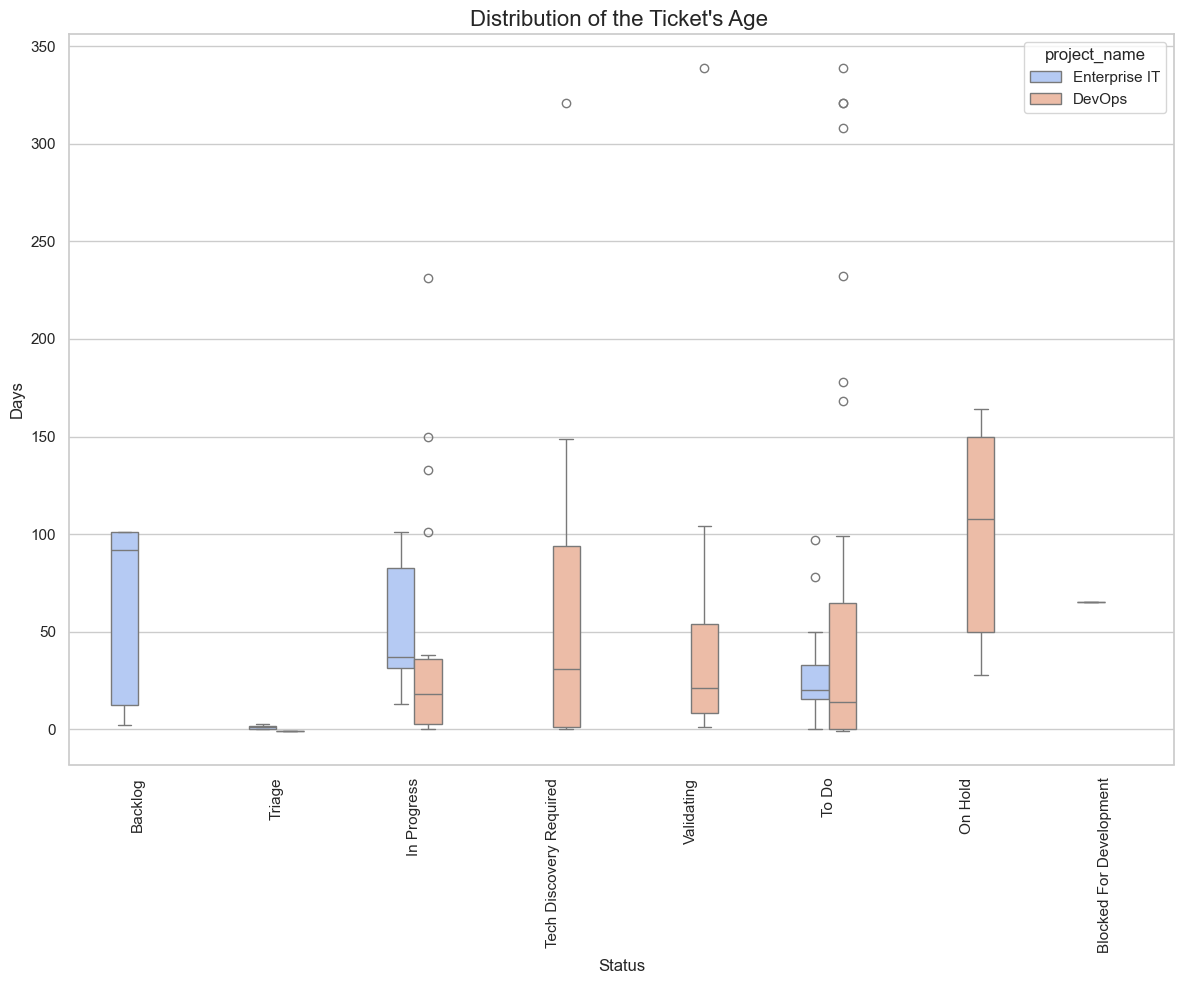

In [49]:
# --- Create the Box Plot ---
# Set a nice theme
sns.set_theme(style="whitegrid")

# Create the figure and axes
# Adjust figsize for better aspect ratio for a single box plot
plt.figure(figsize=(12, 10))

# Generate the box plot
# We use the filtered DataFrame.
# y='last_updated_days' specifies the data for the plot.
# x='status' will use the 'status' column for the x-axis category label.
# Since we filtered for 'In Progress', it will show a single box for this category.
in_progress_issues_df = df_issues[df_issues['status'] != 'Done']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['project_name'] != 'Release Management']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Will Not Do']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Blocked']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Resource Constrained']
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Released Successfully to Production'] # CAR Tickets = Done
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != '❌ Rolled Back']

in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['days_old'] <= 365]
ax = sns.boxplot(
    data=in_progress_issues_df,
    y='days_old',  # This will plot the 'days_old' values
    x='status',  # This will label the x-axis category as 'In Progress'
    palette="coolwarm", # Optional: adds a bit of color
    width=0.4, # Optional: makes the box a bit narrower,
    hue='project_name',  # Optional: if you want to differentiate by project
)

# --- 4. Customize the Plot ---
plt.title("Distribution of the Ticket's Age ", fontsize=16)
plt.ylabel("Days", fontsize=12)
plt.xlabel("Status", fontsize=12) # Label for the x-axis
plt.xticks(rotation=90) # Rotate x-axis labels for better readability

# You can adjust y-axis limits if needed, e.g., to focus on a specific range
# ax.set_ylim(0, 20) # Example: if you want to cap the y-axis

# Ensure everything fits without overlapping
plt.tight_layout()

# --- 5. Display the Plot ---
plt.show()

In [50]:
df_issues[df_issues['status'] == 'In Progress']['last_updated_days'].describe()

count    28.000000
mean      6.785714
std       8.685267
min       0.000000
25%       0.000000
50%       1.500000
75%      15.000000
max      30.000000
Name: last_updated_days, dtype: float64

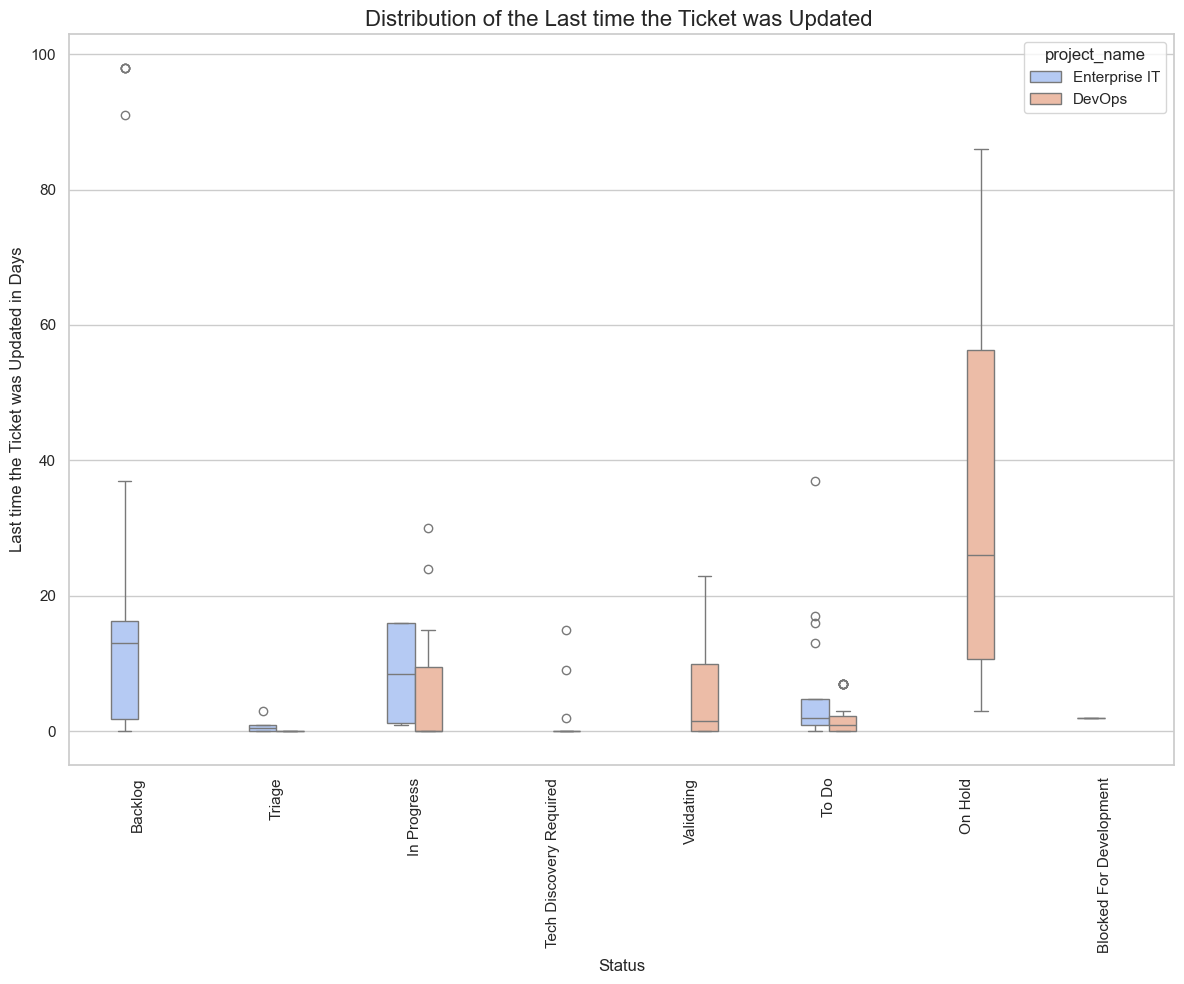

In [51]:
# --- Create the Box Plot ---
# Set a nice theme
sns.set_theme(style="whitegrid")

# Create the figure and axes
# Adjust figsize for better aspect ratio for a single box plot
plt.figure(figsize=(12, 10))

# Generate the box plot
# We use the filtered DataFrame.
# y='last_updated_days' specifies the data for the plot.
# x='status' will use the 'status' column for the x-axis category label.
# Since we filtered for 'In Progress', it will show a single box for this category.
in_progress_issues_df = df_issues[df_issues['status'] != 'Done']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['project_name'] != 'Release Management']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Will Not Do']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Blocked']
in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Resource Constrained']
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != 'Released Successfully to Production'] # CAR Tickets = Done
#in_progress_issues_df = in_progress_issues_df[in_progress_issues_df['status'] != '❌ Rolled Back']
ax = sns.boxplot(
    data=in_progress_issues_df,
    y='last_updated_days',
    x='status',  # This will label the x-axis category as 'In Progress'
    palette="coolwarm", # Optional: adds a bit of color
    width=0.4, # Optional: makes the box a bit narrower
    hue='project_name',  # Optional: if you want to differentiate by project
)

# --- 4. Customize the Plot ---
plt.title("Distribution of the Last time the Ticket was Updated ", fontsize=16)
plt.ylabel("Last time the Ticket was Updated in Days", fontsize=12)
plt.xlabel("Status", fontsize=12) # Label for the x-axis
plt.xticks(rotation=90) # Rotate x-axis labels for better readability

# You can adjust y-axis limits if needed, e.g., to focus on a specific range
# ax.set_ylim(0, 20) # Example: if you want to cap the y-axis

# Ensure everything fits without overlapping
plt.tight_layout()

# --- 5. Display the Plot ---
plt.show()

In [52]:
df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')]['status'].value_counts()

status
Released Successfully to Production    194
To Do                                   64
Backlog                                 28
In Progress                             28
Tech Discovery Required                 17
Validating                              16
Blocked                                 12
Triage                                  11
On Hold                                 10
Resource Constrained                     9
Plan Release                             4
❌ Rolled Back                            3
Blocked For Development                  1
Prepare Release                          1
Name: count, dtype: int64

In [53]:
#status_list = ['Tech Discovery Required']
#df_issues[df_issues['status'].isin(status_list)]

Generating countplot for Issue Status...


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_1602/2785468643.py:8: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout() # Adjust layout to prevent labels overlapping
/Users/jorge.rodriguez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


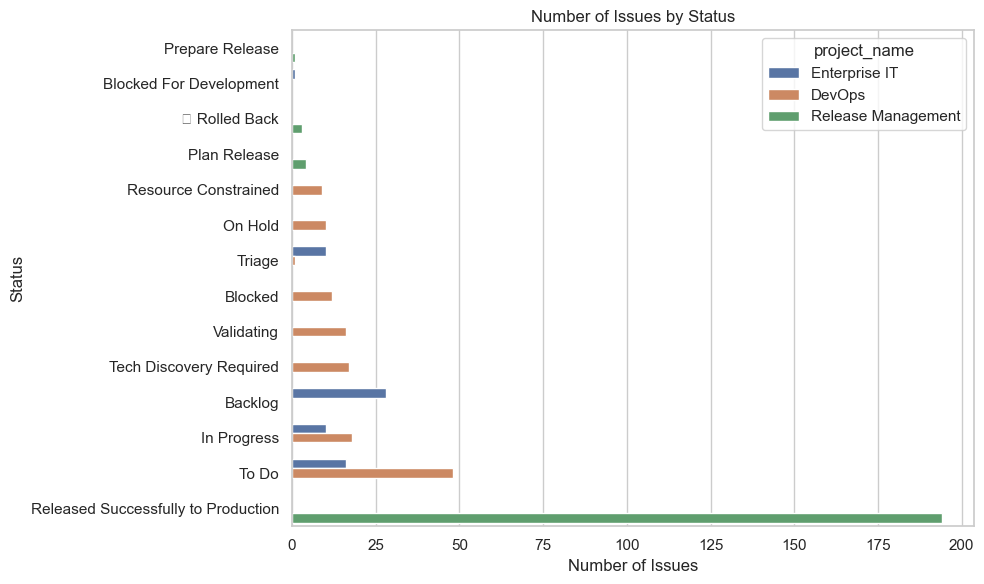

In [54]:
print("Generating countplot for Issue Status...")
plt.figure(figsize=(10, 6)) # Adjust figure size for readability
# Use 'y' axis for categories if names are long or many
sns.countplot(hue='project_name',data=df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')], y='status', order=df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')]['status'].value_counts(ascending=True).index)
plt.title('Number of Issues by Status')
plt.xlabel('Number of Issues')
plt.ylabel('Status')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Generating countplot for Issue Type...


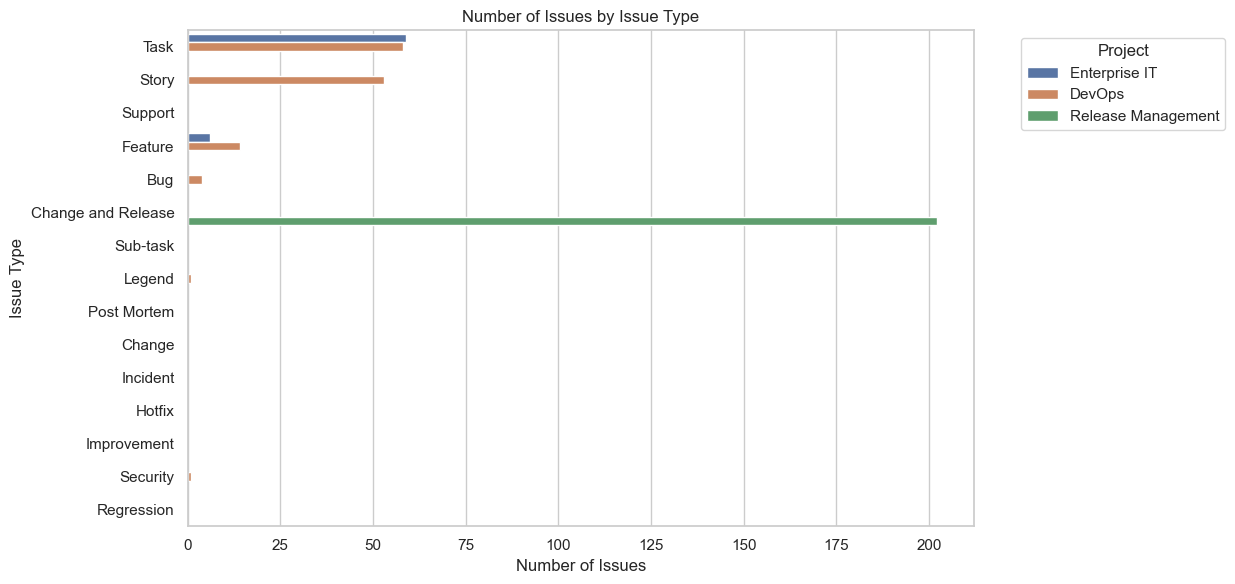

In [55]:
# Assuming df is your DataFrame and imports are done

print("Generating countplot for Issue Type...")
plt.figure(figsize=(10, 6))
sns.countplot(hue='project_name',data=df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')], y='issuetype', order=df_issues['issuetype'].value_counts().sort_values(ascending=False).index)
plt.title('Number of Issues by Issue Type')
plt.xlabel('Number of Issues')
plt.ylabel('Issue Type')
plt.tight_layout()
plt.legend(title='Project', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.show()


Generating countplot for Status, colored by Issue Type...


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_1602/45446298.py:11: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jorge.rodriguez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


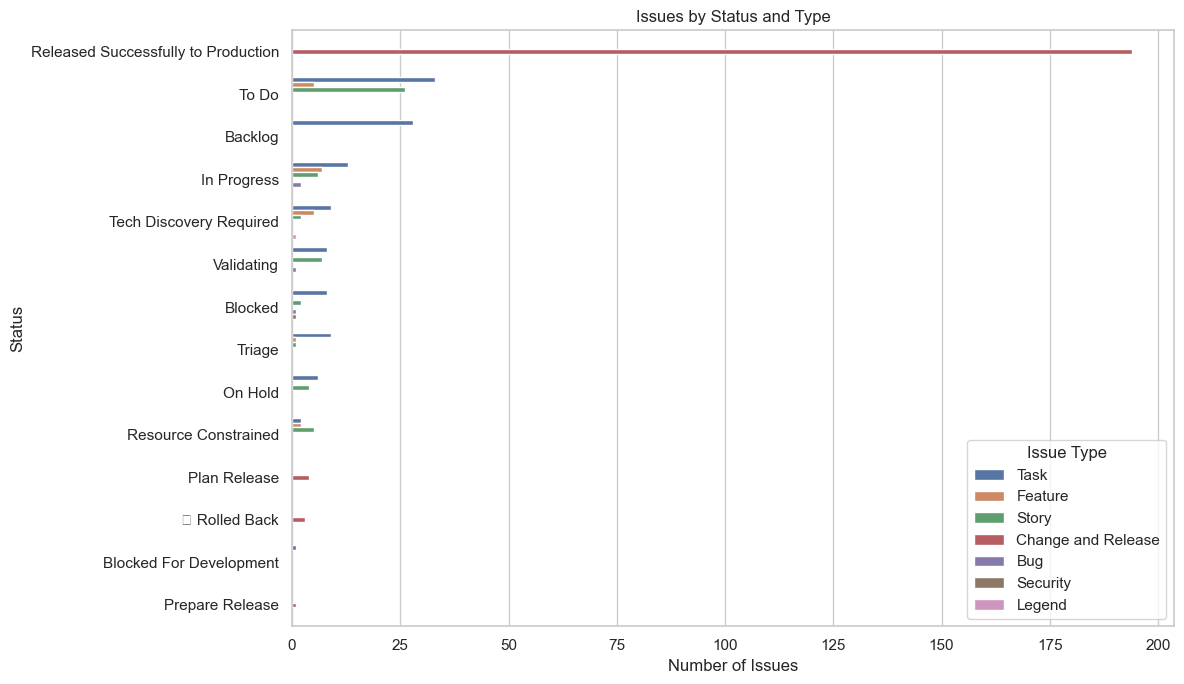

In [56]:
# Assuming df is your DataFrame and imports are done

print("Generating countplot for Status, colored by Issue Type...")
plt.figure(figsize=(12, 7))
# Using 'hue' adds the second category breakdown
sns.countplot(data=df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')], y='status', hue='issuetype', order=df_issues[(df_issues['status'] != 'Done') & (df_issues['status'] != 'Will Not Do')]['status'].value_counts().index)
plt.title('Issues by Status and Type')
plt.xlabel('Number of Issues')
plt.ylabel('Status')
plt.legend(title='Issue Type') # Add a legend
plt.tight_layout()
plt.show()


In [57]:
#df_issues.status.value_counts()

In [58]:
#df_issues.info()

# --- PDF Function / Template for the Reports ---

In [59]:
#import datetime
#from fpdf import FPDF # Using fpdf2 is recommended for more features (pip install fpdf2)
#                     # If using original fpdf (pip install fpdf), some advanced multi_cell args might not be available
#                     # but the core logic for table drawing will be similar.
#import pandas as pd # Assuming top_10_rows is a pandas DataFrame

# --- Configuration ---
REPORT_TITLE = "Jira Issues"
FILENAME_OUTPUT = "jira_in_progress.pdf"
LINE_HEIGHT_MULTIPLIER = 1.0 # Multiplier for cell height based on font size
FONT_FAMILY = "Arial"
FONT_SIZE_TITLE = 16
FONT_SIZE_DATE = 10
FONT_SIZE_HEADER = 6
FONT_SIZE_CELL = 5
FONT_SIZE_CELL_LARGE = 5

# Define column headers for the PDF table
PDF_TABLE_HEADERS = [
    'Ticket', 'Status', 'Priority', 'Business Lead', 'Assignee',
    'Target End', 'Last Updated', 'Days Old', 'Days Left', 'Summary'
]

# Define the corresponding DataFrame column keys in the order they should appear
# Ensure these keys exist in your top_10_rows DataFrame
DATAFRAME_COLUMN_KEYS = [
    'key', 'status', 'priority_name', 'bussiness_lead', 'assignee_name',
    'target_end_date', 'updated', 'days_old', 'days_left', 'summary'
]


class PDFReport(FPDF):
    def __init__(self, REPORT_TITLE, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.report_title = REPORT_TITLE

    def header(self):
        # Set font for the report title
        self.set_font(FONT_FAMILY, 'B', FONT_SIZE_TITLE)
        title_w = self.get_string_width(self.report_title) + 6
        self.set_x((self.w - title_w) / 2) # Center title
        self.cell(title_w, 10, self.report_title, 0, 1, 'C') # ln=1 for new line

        # Add generation date
        self.set_font(FONT_FAMILY, '', FONT_SIZE_DATE)
        date_str = f"Generated: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}"
        date_w = self.get_string_width(date_str) + 6
        self.set_x((self.w - date_w) / 2) # Center date
        self.cell(date_w, 10, date_str, 0, 1, 'C')
        self.ln(5) # Add a little space before table

    def footer(self):
        self.set_y(-15) # Position 1.5 cm from bottom
        self.set_font(FONT_FAMILY, 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}/{{nb}}', 0, 0, 'C')

    def create_table(self, table_data_df, headers, column_keys, col_widths):
        if table_data_df.empty:
            self.set_font(FONT_FAMILY, '', FONT_SIZE_CELL)
            self.cell(0, 10, "No data available for the report.", 0, 1, 'C')
            return

        # Calculate effective line height for cells
        # FPDF's multi_cell takes a line_height argument.
        # We use font_size as a base for this.
        effective_line_height = self.font_size * LINE_HEIGHT_MULTIPLIER

        # Table Header
        self.set_font(FONT_FAMILY, 'B', FONT_SIZE_HEADER)
        self.set_fill_color(200, 220, 255) # Light blue background for header
        self.set_text_color(0) # Black text
        self.set_draw_color(128) # Grey border
        self.set_line_width(0.3)

        for i, header_text in enumerate(headers):
            self.cell(col_widths[i], effective_line_height, header_text, border=1, ln=0, align='C', fill=True)
        self.ln(effective_line_height)

        # Table Data
        self.set_font(FONT_FAMILY, '', FONT_SIZE_CELL)
        self.set_fill_color(245, 245, 245) # Light grey for alternating rows
        fill = False

        for index, row in table_data_df.iterrows():
            # Determine the maximum height needed for this row
            # This involves checking how many lines each cell's content will take
            # For simplicity in this example, we'll use a robust method:
            # draw each cell and track the Y position.
            # print(f"Processing row {index + 1}/{len(table_data_df)}...") # Debugging output
            # print(f"Row data: {row.to_dict()}") # Print row data for debugging
            # print(row['days_left'])

            current_y_start_of_row = self.get_y()
            current_x_position = self.l_margin # Start at left margin
            max_y_after_this_row = current_y_start_of_row # Track the lowest point any cell in this row reaches

            for i, key in enumerate(column_keys):
                cell_value = str(row.get(key, '')) # Get value, default to empty string if key missing
                
                self.set_xy(current_x_position, current_y_start_of_row) # Key: Reset Y for each cell in the row

                # Draw the multi_cell
                # The `effective_line_height` here is the height of *each line* within the multi_cell
                # Draw the multi_cell with manual tracking for broader compatibility
                self.set_xy(current_x_position, current_y_start_of_row)
                # import numpy as np
                if ((row['days_left'] < 0) or (pd.isna(row['days_left'])) and (row['status'] == 'In Progress')):
                    # If days_left is negative or NaN, highlight the cell
                    cell_value_overdue = f"{cell_value} (Overdue)"
                    self.set_font(FONT_FAMILY, 'B', FONT_SIZE_CELL_LARGE)
                    self.set_fill_color(240, 240, 255) # Light grey for alternating rows
                    self.multi_cell(col_widths[i], self.font_size * 1.2 , cell_value, # Use font_size for line height in multi_cell
                                    border=1, align='L', fill=True)
                    self.set_font(FONT_FAMILY, '', FONT_SIZE_CELL)
                    self.set_fill_color(245, 245, 245) # Light grey for alternating rows
                else:
                    self.multi_cell(col_widths[i], self.font_size * 1.2 , cell_value, # Use font_size for line height in multi_cell
                                    border=1, align='L', fill=fill)
                
                if self.get_y() > max_y_after_this_row:
                    max_y_after_this_row = self.get_y()
                
                current_x_position += col_widths[i]


            # After all cells in the row are drawn, set Y to below the tallest cell
            self.set_y(max_y_after_this_row)
            fill = not fill # Alternate fill color for next row
        
        # Add a final line break if there was data, to ensure footer doesn't overlap
        if not table_data_df.empty:
            self.ln(max(effective_line_height / 2, 2)) # Add a small space after the table


def generate_enhanced_report(top_10_rows_df, REPORT_TITLE = "Jira Issues In Progress", FILENAME_OUTPUT="jira_in_progress.pdf"):
    """
    Generates an enhanced PDF report from the DataFrame.
    Args:
        top_10_rows_df (pd.DataFrame): DataFrame containing the data.
                                       Expected to have columns specified in DATAFRAME_COLUMN_KEYS.
    """
  
    pdf = PDFReport(REPORT_TITLE, format='Letter', unit='mm') # Letter: 215.9 x 279.4 mm
    pdf.alias_nb_pages() # Enable page numbering alias '{nb}'
    pdf.add_page()

    # Define column widths (total should be around self.w - margins)
    # Effective page width for content: pdf.w - pdf.l_margin - pdf.r_margin
    # Default margins are 10mm. So, 215.9 - 20 = 195.9 mm for Letter.
    # Adjust these widths based on your content and preferences.
    # Sum of these should ideally be <= (pdf.w - pdf.l_margin - pdf.r_margin)
    page_content_width = pdf.w - pdf.l_margin - pdf.r_margin
    
    # Proportional widths or fixed widths
    col_widths = [
        page_content_width * 0.08, # Ticket
        page_content_width * 0.06, # Status 0.08
        page_content_width * 0.06, # Priority 0.08
        page_content_width * 0.12, # Business Lead
        page_content_width * 0.12, # Assignee
        page_content_width * 0.10, # Target End
        page_content_width * 0.10, # Last Updated
        page_content_width * 0.07, # Days Old
        page_content_width * 0.07, # Days Left
        page_content_width * 0.22  # Summary (largest) 0.18
    ]
    # Ensure sum of col_widths does not exceed page_content_width
    # This can be done by normalizing or adjusting the last column
    current_total_width = sum(col_widths)
    if current_total_width > page_content_width:
        # Simple adjustment: shrink the last column if oversized
        # A more sophisticated approach might scale all columns proportionally
        diff = current_total_width - page_content_width
        col_widths[-1] -= diff
    elif current_total_width < page_content_width:
        # Optionally, expand the last column to fill width
        diff = page_content_width - current_total_width
        col_widths[-1] += diff


    # Ensure the DataFrame has the necessary columns before passing
    try:
        data_for_table = top_10_rows_df[DATAFRAME_COLUMN_KEYS]
    except KeyError as e:
        print(f"Error: DataFrame is missing one or more required columns: {e}")
        print(f"Expected columns: {DATAFRAME_COLUMN_KEYS}")
        print(f"Available columns: {top_10_rows_df.columns.tolist()}")
        # Optionally, create an empty PDF with an error message or raise exception
        pdf.set_font(FONT_FAMILY, 'B', 12)
        pdf.multi_cell(0,10, f"Report generation failed: Missing column(s) - {e}. Check console.", 1, "C")
        pdf.output(FILENAME_OUTPUT, 'F')
        return

    #print(data_for_table)
    
    pdf.create_table(data_for_table, PDF_TABLE_HEADERS, DATAFRAME_COLUMN_KEYS, col_widths)
    
    try:
        pdf.output(FILENAME_OUTPUT, 'F') # 'F' to save to local file
        print(f"Report '{FILENAME_OUTPUT}' generated successfully.")
    except Exception as e:
        print(f"Error saving PDF: {e}")

## --- Tickets in Progress Status ---

## Generate the Report

In [60]:
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
today_date = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
df1 = df_issues[df_issues['status'] == 'In Progress'].copy()  # Use .copy() to avoid SettingWithCopyWarning
df1['due_date_date'] = df1['project_due_date'].dt.date
df1['target_end_date'] = pd.to_datetime(df1['target_end_date'], errors='coerce').dt.date
df1['updated'] = pd.to_datetime(df1['updated'], errors='coerce').dt.date

# Ensure 'today' is a single date (not a column)
today_date = today.date() if hasattr(today, 'date') else pd.to_datetime(today).date()
df1['days_left'] = (df1['target_end_date'] - today_date).apply(lambda x: x.days if pd.notnull(x) else None)

# Get the top 20 rows with the highest days_old
top_10_indices = df1[['bussiness_lead','project_name','priority_id','target_end_date','days_old']].sort_values(by=['project_name','bussiness_lead','priority_id','days_old', 'target_end_date'], ascending=True).index
top_10_rows = df1.loc[top_10_indices]  # Select rows using the indices

# Print results for verification
print(f"All {len(top_10_rows)} Tickets as: {today_date} at {today.hour + 6}:{today.minute} CST")
#print(top_10_rows[['key','status','velocity_days','assignee_name','updated','summary']].to_string(index=False))
print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
               headers=['Ticket', 'Status', 'Priority','Bussiness Lead','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))
# --- Save to CSV ---
# Save the DataFrame to a CSV file
output_file = 'jira_in_progress.csv'
top_10_rows.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")
# --- Save to JSON ---
# Save the DataFrame to a JSON file
#output_file_json = 'jira_issues.json'
#top_10_rows.to_json(output_file_json, orient='records', lines=True)
#print(f"Data saved to {output_file_json}")
# --- Save to CSV ---
# Save the DataFrame to a CSV file
#output_file = 'jira_issues_total.csv'
#df_issues.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")
print("Generating PDF report...")
generate_enhanced_report(top_10_rows,"Jira Issues In Progress","jira_in_progress.pdf")




All 28 Tickets as: 2025-07-11 at 11:48 CST
+-------------+-------------+------------+------------------+-------------------+-------------------+----------------+------------+-------------+-----------------------------------------------------------------------+
| Ticket      | Status      | Priority   | Bussiness Lead   | Assignee Name     | Target End Date   | Last Updated   |   Days Old |   Days Left | Summary                                                               |
|-------------+-------------+------------+------------------+-------------------+-------------------+----------------+------------+-------------+-----------------------------------------------------------------------|
| DEVOPS-7846 | In Progress | Urgent     | Jorge Rodriguez  | Tom Terry         | NaT               | 2025-06-30     |         16 |         nan | Request to delete Corp_IT S3 bucket                                   |
| DEVOPS-7932 | In Progress | High       | Jorge Rodriguez  | Simon Davison     | NaT

## --- Tickets in To Do Status ---

## Generate the Report

In [61]:
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
today_date = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
df1 = df_issues[df_issues['status'] == 'To Do'].copy()  # Use .copy() to avoid SettingWithCopyWarning
df1['due_date_date'] = df1['project_due_date'].dt.date
df1['target_end_date'] = pd.to_datetime(df1['target_end_date'], errors='coerce').dt.date
df1['updated'] = pd.to_datetime(df1['updated'], errors='coerce').dt.date

# Ensure 'today' is a single date (not a column)
today_date = today.date() if hasattr(today, 'date') else pd.to_datetime(today).date()
df1['days_left'] = (df1['target_end_date'] - today_date).apply(lambda x: x.days if pd.notnull(x) else None)

# Get the top 20 rows with the highest days_old
top_10_indices = df1[['bussiness_lead','project_name','priority_id','target_end_date','days_old']].sort_values(by=['project_name','bussiness_lead','priority_id','days_old', 'target_end_date'], ascending=True).index
top_10_rows = df1.loc[top_10_indices]  # Select rows using the indices

# Print results for verification
print(f"All {len(top_10_rows)} Tickets as: {today_date} at {today.hour + 6}:{today.minute} CST")
#print(top_10_rows[['key','status','velocity_days','assignee_name','updated','summary']].to_string(index=False))
print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
               headers=['Ticket', 'Status', 'Priority','Bussiness Lead','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))
# --- Save to CSV ---
# Save the DataFrame to a CSV file
output_file = 'jira_in_to_do.csv'
top_10_rows.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")
# --- Save to JSON ---
# Save the DataFrame to a JSON file
#output_file_json = 'jira_issues.json'
#top_10_rows.to_json(output_file_json, orient='records', lines=True)
#print(f"Data saved to {output_file_json}")
# --- Save to CSV ---
# Save the DataFrame to a CSV file
#output_file = 'jira_issues_total.csv'
#df_issues.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")
print("Generating PDF report...")
generate_enhanced_report(top_10_rows,"Jira Issues In To Do","jira_in_to_do.pdf")


All 64 Tickets as: 2025-07-11 at 11:48 CST
+-------------+----------+------------+------------------+---------------------+-------------------+----------------+------------+-------------+-------------------------------------------------------------------------------------------+
| Ticket      | Status   | Priority   | Bussiness Lead   | Assignee Name       | Target End Date   | Last Updated   |   Days Old |   Days Left | Summary                                                                                   |
|-------------+----------+------------+------------------+---------------------+-------------------+----------------+------------+-------------+-------------------------------------------------------------------------------------------|
| DEVOPS-7948 | To Do    | High       | Jorge Rodriguez  | Tom Terry           | 2025-07-11        | 2025-07-11     |         -1 |           0 | Remove all Access of Mike Admire accounts                                                 |
| DEVOPS-

## --- Tickets in Validating Status ---

## Generate the Report

In [62]:
#df_issues['status'].unique()

In [63]:
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
today_date = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
df1 = df_issues[df_issues['status'] == 'Validating'].copy()  # Use .copy() to avoid SettingWithCopyWarning
df1['due_date_date'] = df1['project_due_date'].dt.date
df1['target_end_date'] = pd.to_datetime(df1['target_end_date'], errors='coerce').dt.date
df1['updated'] = pd.to_datetime(df1['updated'], errors='coerce').dt.date

# Ensure 'today' is a single date (not a column)
today_date = today.date() if hasattr(today, 'date') else pd.to_datetime(today).date()
df1['days_left'] = (df1['target_end_date'] - today_date).apply(lambda x: x.days if pd.notnull(x) else None)

# Get the top 20 rows with the highest days_old
top_10_indices = df1[['bussiness_lead','project_name','priority_id','target_end_date','days_old']].sort_values(by=['bussiness_lead','project_name','priority_id','days_old', 'target_end_date'], ascending=True).index
top_10_rows = df1.loc[top_10_indices]  # Select rows using the indices

# Print results for verification
print(f"All {len(top_10_rows)} Tickets as: {today_date} at {today.hour + 6}:{today.minute} CST")
#print(top_10_rows[['key','status','velocity_days','assignee_name','updated','summary']].to_string(index=False))
print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
               headers=['Ticket', 'Status', 'Priority','Bussiness Lead','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))
# --- Save to CSV ---
# Save the DataFrame to a CSV file
output_file = 'jira_in_validatig.csv'
top_10_rows.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")
# --- Save to JSON ---
# Save the DataFrame to a JSON file
#output_file_json = 'jira_issues.json'
#top_10_rows.to_json(output_file_json, orient='records', lines=True)
#print(f"Data saved to {output_file_json}")
# --- Save to CSV ---
# Save the DataFrame to a CSV file
#output_file = 'jira_issues_total.csv'
#df_issues.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")
print("Generating PDF report...")
generate_enhanced_report(top_10_rows,"Jira Issues In Validatig Status","jira_in_validatig.pdf")

All 16 Tickets as: 2025-07-11 at 11:48 CST
+-------------+------------+------------+------------------+-----------------+-------------------+----------------+------------+-------------+---------------------------------------------------------------------------------------------------------------+
| Ticket      | Status     | Priority   | Bussiness Lead   | Assignee Name   | Target End Date   | Last Updated   |   Days Old |   Days Left | Summary                                                                                                       |
|-------------+------------+------------+------------------+-----------------+-------------------+----------------+------------+-------------+---------------------------------------------------------------------------------------------------------------|
| DEVOPS-7890 | Validating | High       | Jorge Rodriguez  | Adam Shero      | 2025-07-11        | 2025-07-10     |          9 |           0 | [Nonprod] Setup GKE Deployments                  

## --- Tickets in Tech Discovery Status ---

## Generate the Report

In [64]:
today = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
today_date = pd.to_datetime('today', utc=True, errors='coerce').tz_convert('UTC-06:00')
status_list = ['Tech Discovery Required']
df1 = df_issues[df_issues['status'].isin(status_list)].copy()
#df1 = df_issues[df_issues['status'] == 'Tech Discovery Required'].copy()  # Use .copy() to avoid SettingWithCopyWarning
df1['due_date_date'] = df1['project_due_date'].dt.date
df1['target_end_date'] = pd.to_datetime(df1['target_end_date'], errors='coerce').dt.date
df1['updated'] = pd.to_datetime(df1['updated'], errors='coerce').dt.date

# Ensure 'today' is a single date (not a column)
today_date = today.date() if hasattr(today, 'date') else pd.to_datetime(today).date()
df1['days_left'] = (df1['target_end_date'] - today_date).apply(lambda x: x.days if pd.notnull(x) else None)

# Get the top 20 rows with the highest days_old
top_10_indices = df1[['bussiness_lead','project_name','priority_id','target_end_date','days_old']].sort_values(by=['bussiness_lead','project_name','priority_id','days_old', 'target_end_date'], ascending=True).index
top_10_rows = df1.loc[top_10_indices]  # Select rows using the indices

# Print results for verification
print(f"All {len(top_10_rows)} Tickets as: {today_date} at {today.hour + 6}:{today.minute} CST")
#print(top_10_rows[['key','status','velocity_days','assignee_name','updated','summary']].to_string(index=False))
print(tabulate(top_10_rows[['key','status','priority_name','bussiness_lead','assignee_name','target_end_date','updated','days_old','days_left','summary']].values, 
               headers=['Ticket', 'Status', 'Priority','Bussiness Lead','Assignee Name','Target End Date','Last Updated', 'Days Old', 'Days Left','Summary'], tablefmt='psql', showindex=False))
# --- Save to CSV ---
# Save the DataFrame to a CSV file
output_file = 'jira_in_Tech_Discovery_Required.csv'
top_10_rows.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")
# --- Save to JSON ---
# Save the DataFrame to a JSON file
#output_file_json = 'jira_issues.json'
#top_10_rows.to_json(output_file_json, orient='records', lines=True)
#print(f"Data saved to {output_file_json}")
# --- Save to CSV ---
# Save the DataFrame to a CSV file
#output_file = 'jira_issues_total.csv'
#df_issues.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")
print("Generating PDF report...")
generate_enhanced_report(top_10_rows,"Jira Issues In Tech Discovery Required Status","jira_in_Tech_Discovery_Required.pdf")

All 17 Tickets as: 2025-07-11 at 11:48 CST
+-------------+-------------------------+------------+------------------+--------------------+-------------------+----------------+------------+-------------+-----------------------------------------------------------------------------------------------+
| Ticket      | Status                  | Priority   | Bussiness Lead   | Assignee Name      | Target End Date   | Last Updated   |   Days Old |   Days Left | Summary                                                                                       |
|-------------+-------------------------+------------+------------------+--------------------+-------------------+----------------+------------+-------------+-----------------------------------------------------------------------------------------------|
| DEVOPS-7925 | Tech Discovery Required | Medium     | Jorge Rodriguez  | Randall Puterbaugh | NaT               | 2025-07-10     |          1 |         nan | Upgrade OpenSearch Service domain

## --- CAPACITY ---

## CAPACITY for DevOps

In [65]:
#df_issues.query()

In [66]:
#tickets_created = df_issues.groupby(['year_created', 'month_created']).size().reset_index(name='count')

In [67]:
#tickets_updated = df_issues[df_issues['status'] == 'Done'].groupby(['year_updated', 'month_updated']).size().reset_index(name='count')

In [68]:
df_issues_tmp = df_issues[(df_issues['project_name'] == 'DevOps') | (df_issues['project_name'] == 'Release Management')].copy()
#df_issues_tmp = df_issues[(df_issues['project_name'] == 'Release Management')].copy()
tickets_created = df_issues_tmp.groupby(['year_created', 'month_created']).size().reset_index(name='count')
capacity = []
for index, row in tickets_created .iterrows():
    year = row['year_created']
    month = row['month_created']
    count = row['count']
    #project_name = row['project_name']
    #print(f"Year: {year}, Month: {month}, Count: {count}")
    data = {
        'year': year,
        'month': month,
        'created': count
        #'project_name' : project_name
    }
    capacity.append(data)
    #print(f"Year: {year}, Month: {month}, Count: {count}")
# Convert to DataFrame
capacity_df = pd.DataFrame(capacity)
# Convert 'year' and 'month' to datetime
capacity_df['date'] = pd.to_datetime(capacity_df[['year', 'month']].assign(day=1))
capacity_df['date'] = pd.to_datetime(capacity_df['date'], format='%Y-%m-%d')
capacity_df['date'] = capacity_df['date'].dt.date
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
# Drop the original 'year' and 'month' columns
capacity_df = capacity_df[capacity_df['year'] > 2022].copy()
capacity_df.drop(columns=['year', 'month'], inplace=True)
#capacity_df.index = pd.to_datetime(capacity_df['date'])
capacity_created = capacity_df.copy()
# Rename 'count' to 'capacity'
#capacity_df.rename(columns={'count': 'updated'}, inplace=True)
# Print the DataFrame
#print(capacity_created)

In [69]:
#df_issues_tmp = df_issues[(df_issues['project_name'] == 'DevOps')].copy()
df_issues_tmp = df_issues[(df_issues['project_name'] == 'DevOps') | (df_issues['project_name'] == 'Release Management')].copy()
tickets_updated = df_issues_tmp[(df_issues['status'] == 'Done') | (df_issues['status'] == 'Released Successfully to Production')].groupby(['year_updated', 'month_updated']).size().reset_index(name='count')
capacity = []
for index, row in tickets_updated.iterrows():
    year = row['year_updated']
    month = row['month_updated']
    count = row['count']
    #project_name = row['project_name']
    #print(f"Year: {year}, Month: {month}, Count: {count}")
    data = {
        'year': year,
        'month': month,
        'completed': count
        #'project_name' : project_name
    }
    capacity.append(data)
    #print(f"Year: {year}, Month: {month}, Count: {count}")
# Convert to DataFrame
capacity_df = pd.DataFrame(capacity)
# Convert 'year' and 'month' to datetime
capacity_df['date'] = pd.to_datetime(capacity_df[['year', 'month']].assign(day=1))
capacity_df['date'] = pd.to_datetime(capacity_df['date'], format='%Y-%m-%d')
capacity_df['date'] = capacity_df['date'].dt.date
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
# Drop the original 'year' and 'month' columns
capacity_df = capacity_df[capacity_df['year'] > 2022].copy()
capacity_df.drop(columns=['year', 'month'], inplace=True)
#capacity_df.index = pd.to_datetime(capacity_df['date'])
capacity_updated = capacity_df.copy()
#capacity_updated['complited'] = capacity_created['created']
# Rename 'count' to 'capacity'
#capacity_df.rename(columns={'count': 'updated'}, inplace=True)
# Print the DataFrame
#print(capacity_updated)
    

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_1602/3733887669.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tickets_updated = df_issues_tmp[(df_issues['status'] == 'Done') | (df_issues['status'] == 'Released Successfully to Production')].groupby(['year_updated', 'month_updated']).size().reset_index(name='count')


In [70]:
total_capacity = pd.merge(capacity_created, capacity_updated, on='date', how='outer')
total_capacity['created'] = total_capacity['created'].fillna(0)
#total_capacity

In [71]:
#all_data = pd.melt(total_capacity, id_vars=['date'], value_vars=['created', 'updated'], var_name='type', value_name='count')
#all_data['date'] = pd.to_datetime(all_data['date'])
#all_data['date'] = all_data['date'].dt.to_period('M').dt.to_timestamp()


<Figure size 1400x800 with 0 Axes>

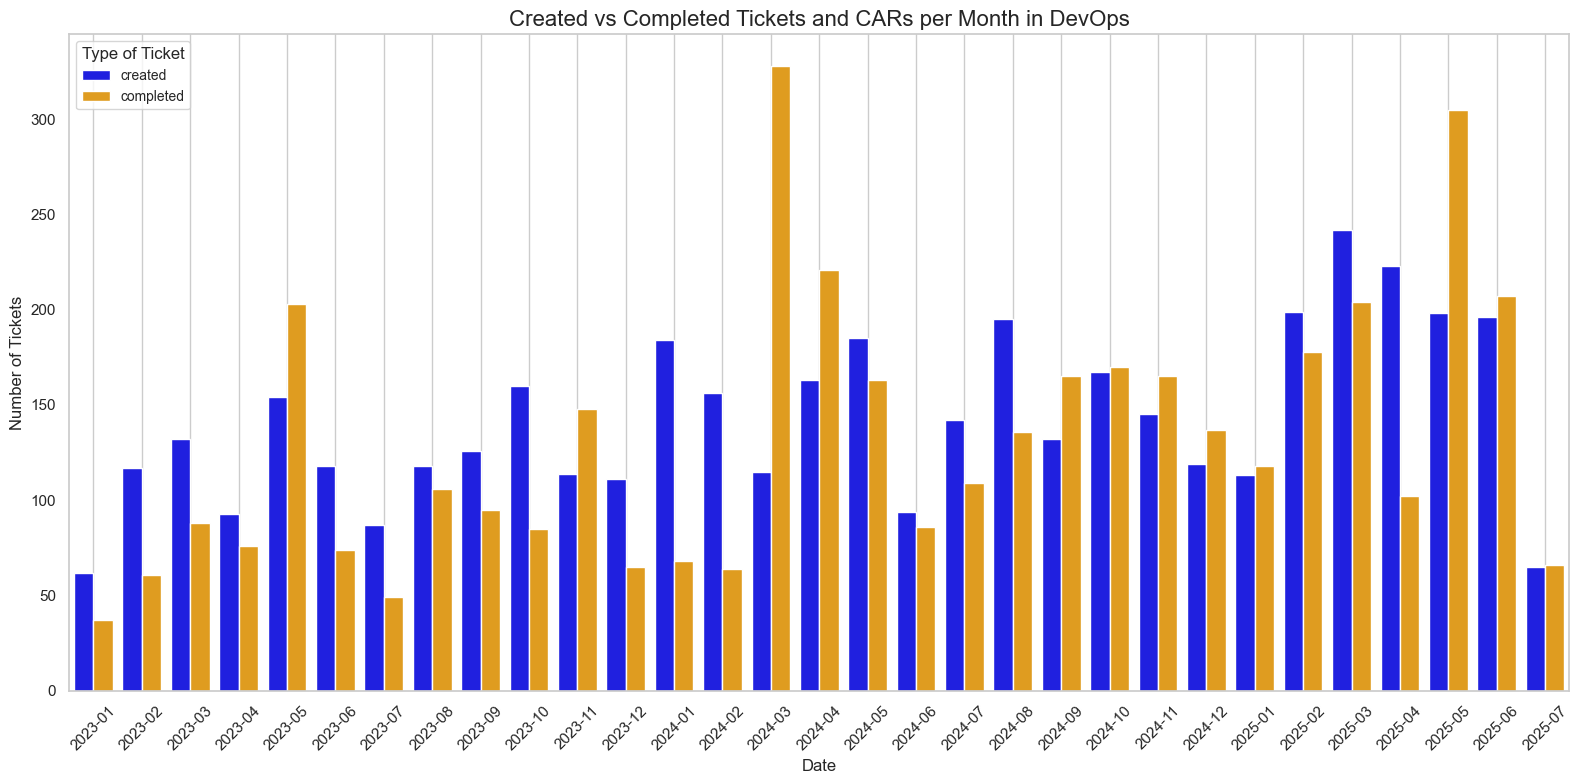

In [72]:
# Reshape the DataFrame for plotting
all_data = pd.melt(total_capacity, id_vars=['date'], value_vars=['created', 'completed'], var_name='type', value_name='count')
all_data['display_date'] = all_data['date'].apply(
    lambda x: x.strftime('%Y-%m') if pd.notnull(x) else 'N/A' # Or None, or ""
)
# Plot grouped bar chart
plt.figure(figsize=(14, 8)) # Adjusted figure size for potentially more bars
# capacity_updated.plot(kind='bar', x='date', y='updated', color='orange', label='Updated', ax=plt.gca())
#capacity_created.plot(kind='bar', x='date', y='created', color='blue', label='Created', ax=plt.gca())
#plt.figure(figsize=(14, 7)) # Adjusted figure size for potentially more bars
fig = plt.figure(figsize=(16, 8))
sns.barplot(data=all_data, x='display_date', y='count', hue='type', palette=['blue', 'orange'])
# Set the title and labels

plt.title('Created vs Completed Tickets and CARs per Month in DevOps', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend(title='Type of Ticket', loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.legend(loc='upper left', title='Type of Ticket', fontsize='small', title_fontsize='medium')
plt.show()

## CAPACITY for EIT

In [73]:
df_issues_tmp = df_issues[(df_issues['project_name'] == 'Enterprise IT')].copy()
tickets_created = df_issues_tmp.groupby(['year_created', 'month_created']).size().reset_index(name='count')
capacity = []
for index, row in tickets_created .iterrows():
    year = row['year_created']
    month = row['month_created']
    count = row['count']
    #project_name = row['project_name']
    #print(f"Year: {year}, Month: {month}, Count: {count}")
    data = {
        'year': year,
        'month': month,
        'created': count
        #'project_name' : project_name
    }
    capacity.append(data)
    #print(f"Year: {year}, Month: {month}, Count: {count}")
# Convert to DataFrame
capacity_df = pd.DataFrame(capacity)
# Convert 'year' and 'month' to datetime
capacity_df['date'] = pd.to_datetime(capacity_df[['year', 'month']].assign(day=1))
capacity_df['date'] = pd.to_datetime(capacity_df['date'], format='%Y-%m-%d')
capacity_df['date'] = capacity_df['date'].dt.date
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
# Drop the original 'year' and 'month' columns
capacity_df = capacity_df[capacity_df['year'] > 2022].copy()
capacity_df.drop(columns=['year', 'month'], inplace=True)
#capacity_df.index = pd.to_datetime(capacity_df['date'])
capacity_created = capacity_df.copy()
# Rename 'count' to 'capacity'
#capacity_df.rename(columns={'count': 'updated'}, inplace=True)
# Print the DataFrame
#print(capacity_created)

In [74]:
df_issues_tmp = df_issues[(df_issues['project_name'] == 'Enterprise IT')].copy()
tickets_updated = df_issues_tmp[df_issues['status'] == 'Done'].groupby(['project_name','year_updated', 'month_updated']).size().reset_index(name='count')
capacity = []
for index, row in tickets_updated.iterrows():
    year = row['year_updated']
    month = row['month_updated']
    count = row['count']
    project_name = row['project_name']
    #print(f"Year: {year}, Month: {month}, Count: {count}")
    data = {
        'year': year,
        'month': month,
        'complited': count,
        'project_name' : project_name
    }
    capacity.append(data)
    #print(f"Year: {year}, Month: {month}, Count: {count}")
# Convert to DataFrame
capacity_df = pd.DataFrame(capacity)
# Convert 'year' and 'month' to datetime
capacity_df['date'] = pd.to_datetime(capacity_df[['year', 'month']].assign(day=1))
capacity_df['date'] = pd.to_datetime(capacity_df['date'], format='%Y-%m-%d')
capacity_df['date'] = capacity_df['date'].dt.date
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
#capacity_df['date'] = capacity_df['date'].dt.to_period('M').dt.to_timestamp()
# Drop the original 'year' and 'month' columns
capacity_df = capacity_df[capacity_df['year'] > 2022].copy()
capacity_df.drop(columns=['year', 'month'], inplace=True)
#capacity_df.index = pd.to_datetime(capacity_df['date'])
capacity_updated = capacity_df.copy()
#capacity_updated['complited'] = capacity_created['created']
# Rename 'count' to 'capacity'
#capacity_df.rename(columns={'count': 'updated'}, inplace=True)
# Print the DataFrame
#print(capacity_updated)

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_1602/173076131.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tickets_updated = df_issues_tmp[df_issues['status'] == 'Done'].groupby(['project_name','year_updated', 'month_updated']).size().reset_index(name='count')


In [75]:
total_capacity = pd.merge(capacity_created, capacity_updated, on='date', how='outer')
total_capacity['created'] = total_capacity['created'].fillna(0)

<Figure size 1400x800 with 0 Axes>

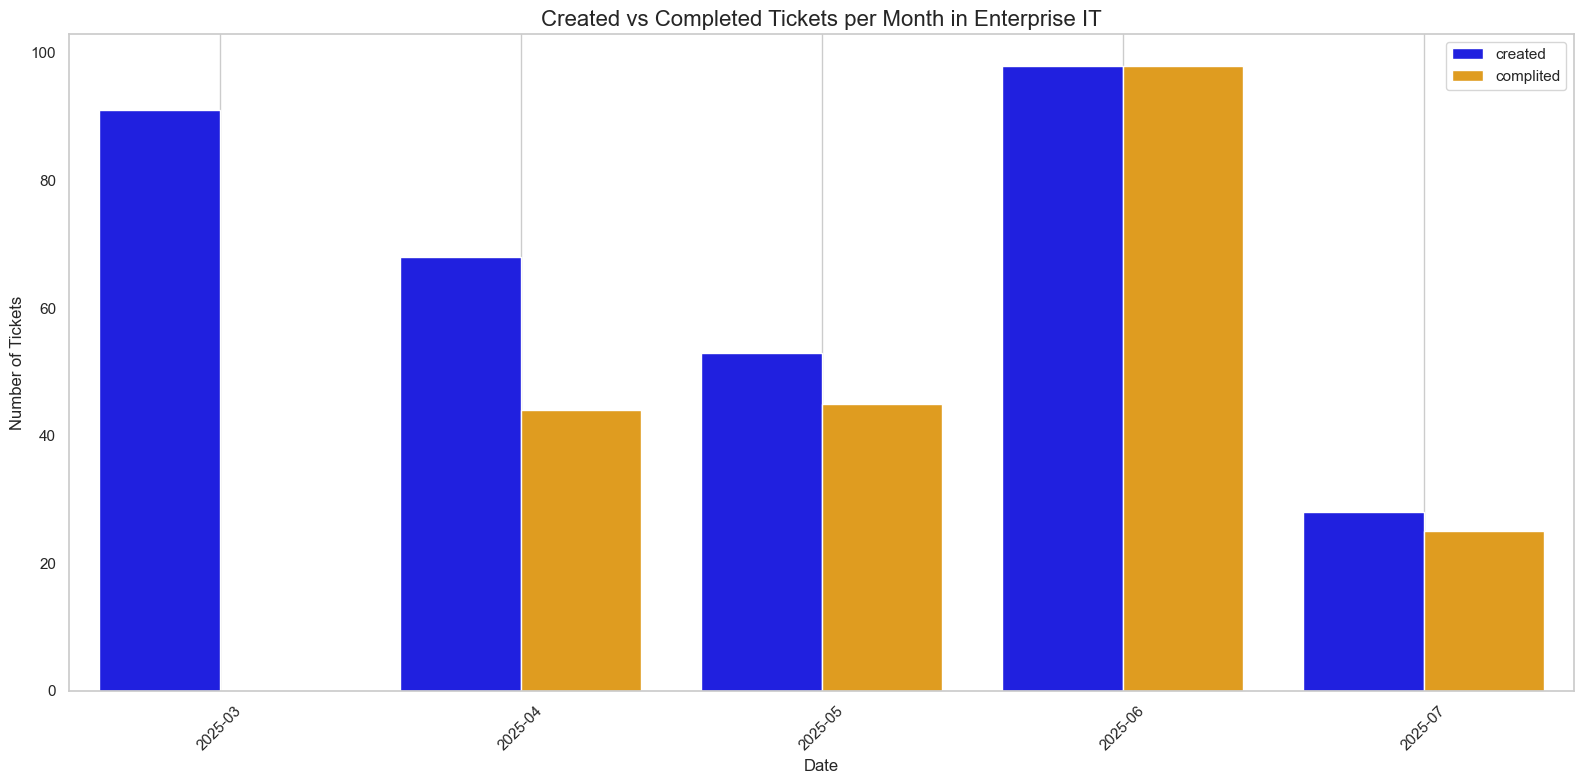

In [76]:
# Reshape the DataFrame for plotting
all_data = pd.melt(total_capacity, id_vars=['date'], value_vars=['created', 'complited'], var_name='type', value_name='count')
all_data['display_date'] = all_data['date'].apply(
    lambda x: x.strftime('%Y-%m') if pd.notnull(x) else 'N/A' # Or None, or ""
)
# Plot grouped bar chart
plt.figure(figsize=(14, 8)) # Adjusted figure size for potentially more bars
# capacity_updated.plot(kind='bar', x='date', y='updated', color='orange', label='Updated', ax=plt.gca())
#capacity_created.plot(kind='bar', x='date', y='created', color='blue', label='Created', ax=plt.gca())
#plt.figure(figsize=(14, 7)) # Adjusted figure size for potentially more bars
fig = plt.figure(figsize=(16, 8))
sns.barplot(data=all_data, x='display_date', y='count', hue='type', palette=['blue', 'orange'])
# Set the title and labels

plt.title('Created vs Completed Tickets per Month in Enterprise IT', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.legend(title='Type of Ticket', loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.legend()
plt.show()


In [77]:
from datetime import datetime

# --- Parameters ---
# Define your time period (example: tickets DONE between 2025-06-01 and 2025-07-01)
start_date = "2025-06-01"
end_date = "2025-08-01"

# JQL to filter issues with status DONE in the time period
jql_query = (
    f'status = "Done" AND statusCategoryChangedDate >= "{start_date}" AND statusCategoryChangedDate < "{end_date}" AND (project = "{PROJECT_KEY}" OR project = "{PROJECT_KEY}" OR project = "{PROJECT_KEY}")'
)

# Fetch issues (adjust maxResults as needed)
search_params = {'jql': jql_query, 'maxResults': False, 'fields': fields_to_fetch}
done_iterator = jira.search_issues(
    jql_str=search_params['jql'],
    maxResults=search_params['maxResults'],
    fields=search_params['fields'],
    expand='changelog',  # This will include the History (changelog) for each issue
    json_result=False
) # Get Issue objects
'''
done_issues = jira.search_issues(jql_query, maxResults=2000, fields="summary,description")

# Collect comments and descriptions
issues_comments = []

for issue in done_issues:
    issue_data = {
        "key": issue.key,
        "summary": issue.fields.summary,
        "description": getattr(issue.fields, "description", ""),
        "comments": []
    }
    # Get all comments for the issue
    comments = jira.comments(issue)
    print(f"Processing issue: {issue.key} with {len(comments)} comments")
    for comment in comments:
        issue_data["comments"].append({
            "author": comment.author.displayName,
            "created": comment.created,
            "body": comment.body
        })
    issues_comments.append(issue_data)

# Example: print the first issue's comments and description
if issues_comments:
    print(f"Issue: {issues_comments[0]['key']}")
    print("Description:", issues_comments[0]['description'])
    print("Comments:")
    for c in issues_comments[0]['comments']:
        print(f"- {c['author']} ({c['created']}): {c['body']}")
else:
    print("No DONE issues found in the specified period.")
'''


'\ndone_issues = jira.search_issues(jql_query, maxResults=2000, fields="summary,description")\n\n# Collect comments and descriptions\nissues_comments = []\n\nfor issue in done_issues:\n    issue_data = {\n        "key": issue.key,\n        "summary": issue.fields.summary,\n        "description": getattr(issue.fields, "description", ""),\n        "comments": []\n    }\n    # Get all comments for the issue\n    comments = jira.comments(issue)\n    print(f"Processing issue: {issue.key} with {len(comments)} comments")\n    for comment in comments:\n        issue_data["comments"].append({\n            "author": comment.author.displayName,\n            "created": comment.created,\n            "body": comment.body\n        })\n    issues_comments.append(issue_data)\n\n# Example: print the first issue\'s comments and description\nif issues_comments:\n    print(f"Issue: {issues_comments[0][\'key\']}")\n    print("Description:", issues_comments[0][\'description\'])\n    print("Comments:")\n    f

In [1409]:
done_iterator[100].changelog  # Access the changelog (history) of the first issue

In [78]:
# Convert iterator to a list if needed
done_issues_list = list(done_iterator)
comments_list = []
issue_key_list = []
print(f"Total DONE issues found: {len(done_issues_list)}")
# More efficient: iterate directly over done_issues_list, avoid indexing
for issue in done_issues_list:
    comments = jira.comments(issue)
    #print(len(issue.fields.summary))
    '''
    if hasattr(issue, "changelog") and issue.changelog:
        #print(f"Issue {issue.key} has changelog with {len(issue.changelog.histories)} entries.")
        for history in issue.changelog.histories:
            #print(f"History for issue {issue.key}: {history.items}")
            for item in history.items:
                if item.field == 'status' and item.toString == 'Done':
                    comments_list.append(f"Status changed to Done on {history.created} by {history.author.displayName}")
                    issue_key_list.append(issue.key)
    '''
    comments_list.append(issue.fields.summary)
    issue_key_list.append(issue.key)
    if comments:
        for comment in comments:
            comments_list.append(comment.body)
            issue_key_list.append(issue.key)


Total DONE issues found: 199


In [79]:
comments_df = pd.DataFrame({
    'issue_key': issue_key_list,
    'comment_body': comments_list
})
# Save comments to a CSV file
comments_df.to_csv('jira_done_issues_comments.csv', index=False)
print("Comments saved to 'jira_done_issues_comments.csv'.") 


Comments saved to 'jira_done_issues_comments.csv'.


In [80]:
comments_df.sample(10)  # Display a sample of 10 comments for verification


,issue_key,comment_body
212,DEVOPS-7822,The users have been granted access to the repo...
599,DEVOPS-7657,[~accountid:712020:3cb8e6ba-c90b-467c-8abb-236...
752,DEVOPS-6891,[~accountid:60e4d2b45cdb680071cdf5fa] As far a...
287,DEVOPS-7797,"Approved - Jason Cox, VP of Engineering."
650,DEVOPS-7619,This task was blocked by a GitLab pipeline iss...
88,DEVOPS-7883,"The user [""abhishek.johri@audacy.com|mailto:""a..."
596,DEVOPS-7657,[DAC | Audio Licensing | Transform/Utility] Cr...
298,DEVOPS-7795,When I attempt to upload a zip file to the GCS...
141,DEVOPS-7857,All work is completed. [~accountid:6239c8a18d8...
714,DEVOPS-7474,Enable Google Drive API on wo-wos-reporting-prod


In [81]:
len(comments_df['issue_key'].unique()) # Get the number of unique issue keys from the comments DataFrame

199

# Word Cloud Generation

In [1337]:
#! pip3 install wordcloud

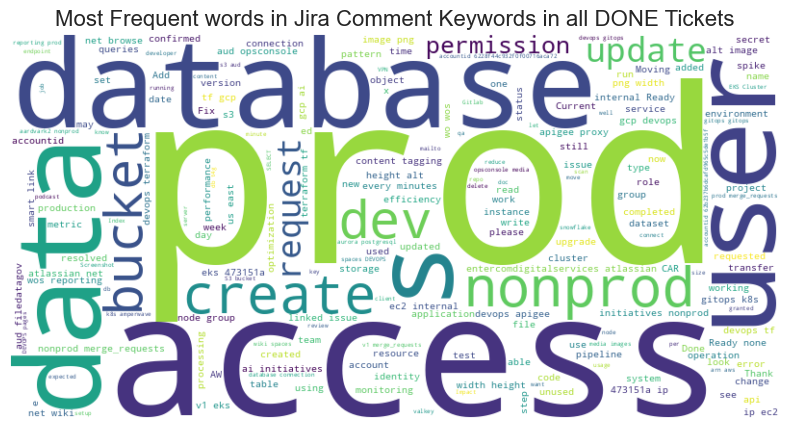

In [104]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all comments into a single string
all_comments_text = " ".join(comments_df['comment_body'].astype(str))
all_comments_text = all_comments_text.replace('\n', ' ')  # Replace newlines with spaces for better word cloud generation
all_comments_text = all_comments_text.replace('will', ' ')  # Replace 'will' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('Jira', ' ')  # Replace 'Jira' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('noformat', ' ')  # Replace 'noformat' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('https', ' ')  # Replace 'https' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('gitlab', ' ')  # Replace 'gitlab' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('audacy', ' ')  # Replace 'audacy' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('need', ' ')  # Replace 'need' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('done', ' ')  # Replace 'done' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('ticket', ' ')  # Replace 'ticket' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('h2', ' ')  # Replace 'h2' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('h3', ' ')  # Replace 'h3' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('index', ' ')  # Replace 'index' with a space for better word cloud generation
all_comments_text = all_comments_text.replace('query', ' ')  # Replace 'query' with a space for better word cloud generation

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent words in Jira Comment Keywords in all DONE Tickets', fontsize=16)
plt.show() # Use plt.show() to display, or plt.savefig() to save

# https://stackoverflow.com/questions/38916452/nltk-download-ssl-certificate-verify-failed

# Top 20 Most Common Words Bar Chart

In [99]:
''''
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
'''


"'\nimport nltk\nimport ssl\n\ntry:\n    _create_unverified_https_context = ssl._create_unverified_context\nexcept AttributeError:\n    pass\nelse:\n    ssl._create_default_https_context = _create_unverified_https_context\n\nnltk.download()\n"

In [101]:
import nltk

print("NLTK data search paths:")
for path in nltk.data.path:
    print(path)

NLTK data search paths:
/Users/jorge.rodriguez/nltk_data
/Library/Frameworks/Python.framework/Versions/3.13/nltk_data
/Library/Frameworks/Python.framework/Versions/3.13/share/nltk_data
/Library/Frameworks/Python.framework/Versions/3.13/lib/nltk_data
/usr/share/nltk_data
/usr/local/share/nltk_data
/usr/lib/nltk_data
/usr/local/lib/nltk_data


In [103]:
import nltk

# Example: Check for 'stopwords'
try:
    stopwords_path = nltk.data.find('corpora/stopwords')
    print(f"\n'stopwords' resource found at: {stopwords_path}")
except LookupError:
    print("\n'stopwords' resource not found in NLTK data paths.")

# Example: Check for 'wordnet'
try:
    wordnet_path = nltk.data.find('corpora/wordnet')
    print(f"'wordnet' resource found at: {wordnet_path}")
except LookupError:
    print("'wordnet' resource not found in NLTK data paths.")

# Example: Check for 'omw-1.4' (Open Multilingual Wordnet)
try:
    omw_path = nltk.data.find('tokenizers/punkt/')
    print(f"'punkt' resource found at: {omw_path}")
except LookupError:
    print("'punkt' resource not found in NLTK data paths.")


'stopwords' resource found at: /Users/jorge.rodriguez/nltk_data/corpora/stopwords
'wordnet' resource found at: /Users/jorge.rodriguez/nltk_data/corpora/wordnet
'punkt' resource found at: /Users/jorge.rodriguez/nltk_data/tokenizers/punkt


In [98]:
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

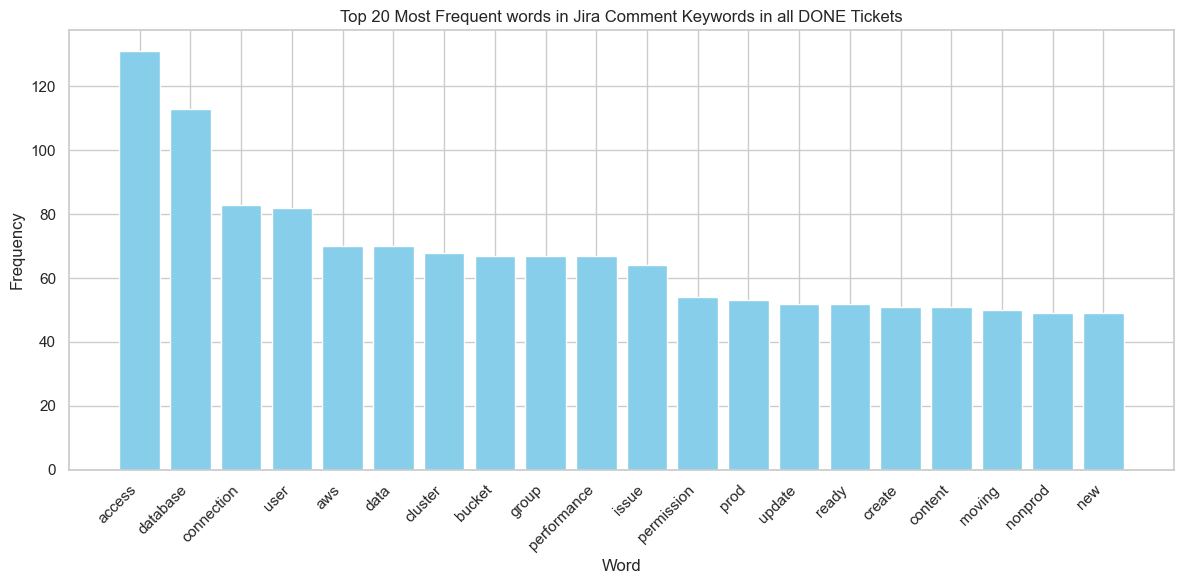

In [106]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Assuming 'all_comments_text' contains the combined preprocessed text
# (from the 'processed_comment' column of your DataFrame)

# Download required NLTK data if not already present
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Tokenize, lowercase, remove punctuation, remove stopwords, and lemmatize
tokens = nltk.word_tokenize(all_comments_text)
words = [
    lemmatizer.lemmatize(word.lower())
    for word in tokens
        if word.isalpha() and word.lower() not in stop_words
]
most_common_words = Counter(words).most_common(20) # Top 20 words

common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
plt.bar(common_words_df['word'], common_words_df['count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent words in Jira Comment Keywords in all DONE Tickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # Use plt.show() to display, or plt.savefig() to save

# Top 15 Jira Issues by Comment Count Bar Chart

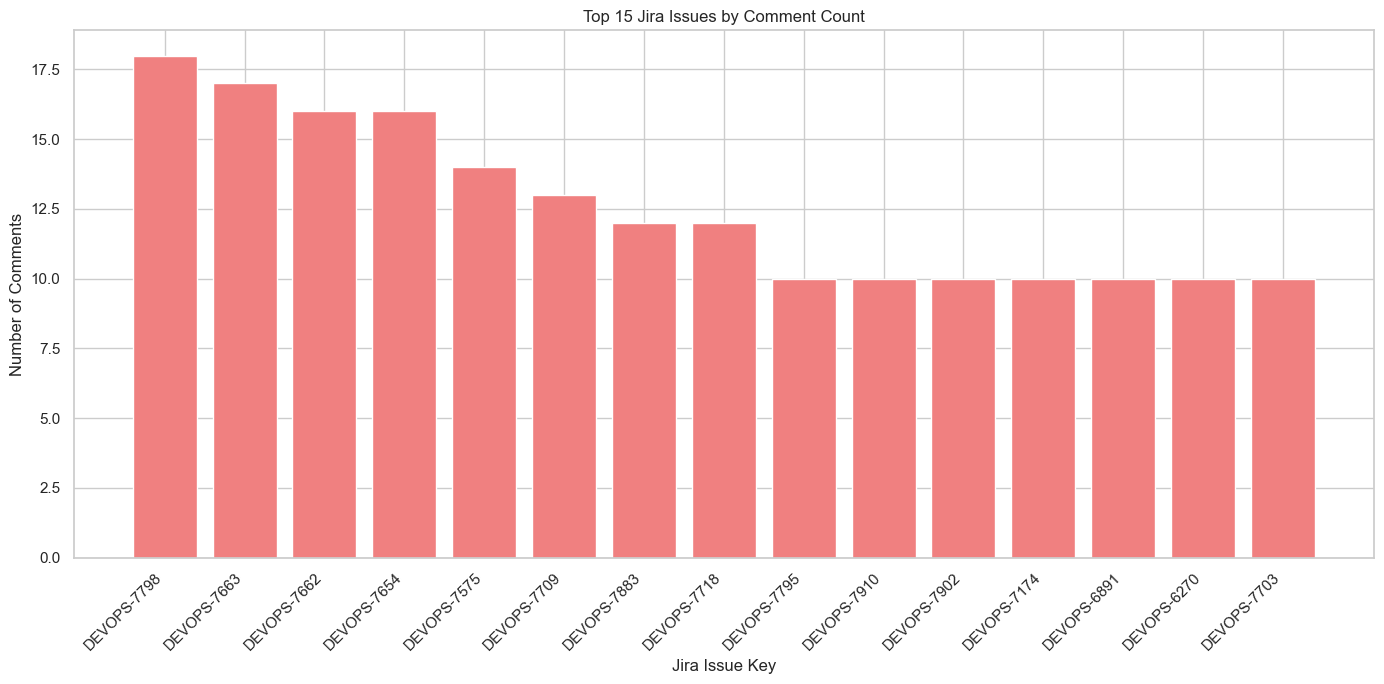

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with 'issue_key' column

comments_per_issue = comments_df['issue_key'].value_counts().reset_index()
comments_per_issue.columns = ['issue_key', 'comment_count']

top_15_issues = comments_per_issue.head(15)

plt.figure(figsize=(14, 7))
plt.bar(top_15_issues['issue_key'], top_15_issues['comment_count'], color='lightcoral')
plt.xlabel('Jira Issue Key')
plt.ylabel('Number of Comments')
plt.title('Top 15 Jira Issues by Comment Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # Use plt.show() to display, or plt.savefig() to save

# generate the bi-grams visualization and analysis:

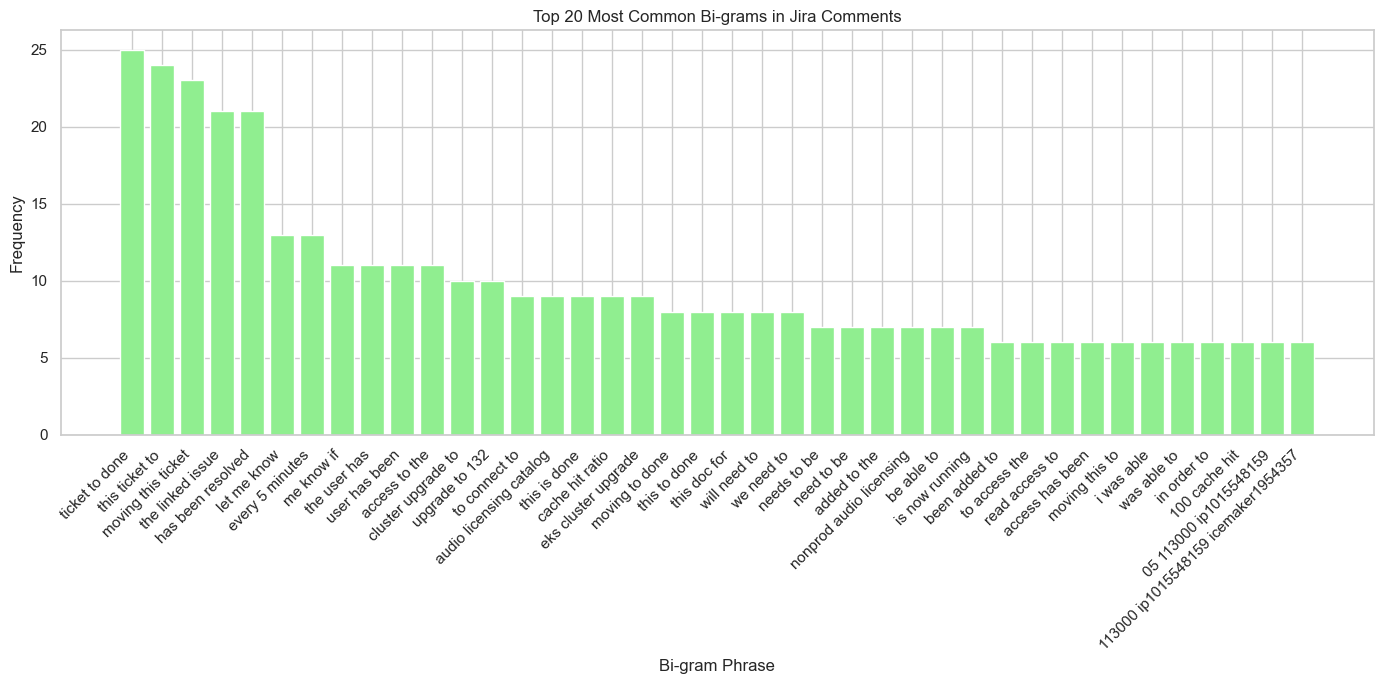

In [108]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

NUMBER_OF_WORDS_TO_CONNECT = 3 # For bi-grams, set to 2; for tri-grams, set to 3, etc.
# Function for basic text preprocessing
def basic_preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove non-alphanumeric characters (keep spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Function to generate N-grams (e.g., bi-grams if n=2)
def generate_ngrams(text, n=NUMBER_OF_WORDS_TO_CONNECT):
    # Split text into words
    words = text.split()
    # Generate n-grams
    ngrams = []
    for i in range(len(words) - n + 1):
        ngrams.append(" ".join(words[i:i+n]))
    return ngrams

# Assuming 'df' is your DataFrame loaded from 'jira_done_issues_comments.csv'
# If you are running this code independently, you'll need to load the CSV first:
# df = pd.read_csv('jira_done_issues_comments.csv')

# Apply basic preprocessing to the 'comment_body' column
comments_df['processed_comment'] = comments_df['comment_body'].apply(basic_preprocess_text)

# Combine all processed comments into a single string
all_comments_text = " ".join(comments_df['processed_comment'])

# Generate bi-grams from the combined text
bi_grams = generate_ngrams(all_comments_text, n=NUMBER_OF_WORDS_TO_CONNECT)

# Get the most common bi-grams
most_common_bi_grams = Counter(bi_grams).most_common(40) # Top 20 bi-grams

# Create a DataFrame for common bi-grams for easy plotting
common_bi_grams_df = pd.DataFrame(most_common_bi_grams, columns=['bi_gram', 'count'])

# Plotting the most common bi-grams
plt.figure(figsize=(14, 7))
plt.bar(common_bi_grams_df['bi_gram'], common_bi_grams_df['count'], color='lightgreen')
plt.xlabel('Bi-gram Phrase')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Bi-grams in Jira Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # Use plt.show() to display the plot, or plt.savefig('top_20_bi_grams.png') to save it

## --- Velocity Graphs ---

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_11134/2129172419.py:53: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jorge.rodriguez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


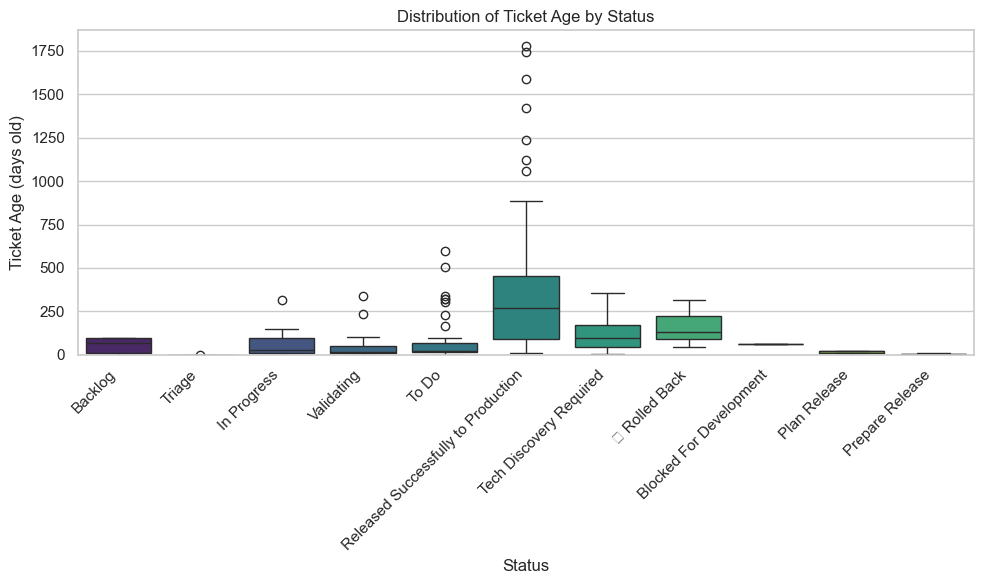

In [1251]:
# --- Plotting ---
# Set the visual theme for the plots
sns.set_theme(style="whitegrid")

# Create the figure and axes for the plot
# Adjust figsize=(width, height) in inches as needed
plt.figure(figsize=(10, 6))

# --- Create the Box Plot ---
# x-axis: The status categories from your 'velocity' column
# y-axis: The age values from your age column
# data: Your DataFrame
# palette: Optional color scheme
df = df_issues.copy()
#df = df[(df['updated'].dt.year > 2000) & (df['created'].dt.year > 2000)] # Filter out rows with NaT values
# Now you can safely use the .dt accessor
#df = df[df['status'] == 'In Progress'] # Filter out NaT values
df = df[df['status'] != 'Done'] # Filter out NaT values
df = df[df['status'] != 'Will Not Do'] # Filter out NaT values
df = df[df['status'] != 'Blocked'] # Filter out NaT values
df = df[df['status'] != 'Resource Constrained'] # Filter out NaT values
df = df[df['status'] != 'On Hold'] # Filter out NaT values
#df = df[df['status'] != 'Tech Discovery Required'] # Filter out NaT values
#df = df[df['days_old'] <= 365] # Filter out NaT values

# Ensure 'velocity' is of type timedelta
#df['velocity'] = pd.to_timedelta(df['velocity'], errors='coerce')

# Use .dt.days to extract the number of days from the 'velocity' column
#d f['velocity_days'] = df['velocity'].dt.days


# Create the box plot using the 'velocity_days' column
ax = sns.boxplot(x='status', y='days_old', data=df, palette="viridis", hue='status')

# --- Customize the Plot ---
# Add a title
plt.title(f'Distribution of Ticket Age by Status')

# Set axis labels
plt.xlabel('Status')
plt.ylabel('Ticket Age (days old)')
y_min, y_max = plt.ylim() # Get current y-axis limits
y_min = 0 # Set minimum y-axis limit to 0
#y_max = 400
plt.ylim(y_min, y_max) # Set y-axis limits to the current limits


# Rotate x-axis labels if they are long or overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# --- Display the Plot ---
plt.show()

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_11134/452486793.py:13: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
/Users/jorge.rodriguez/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


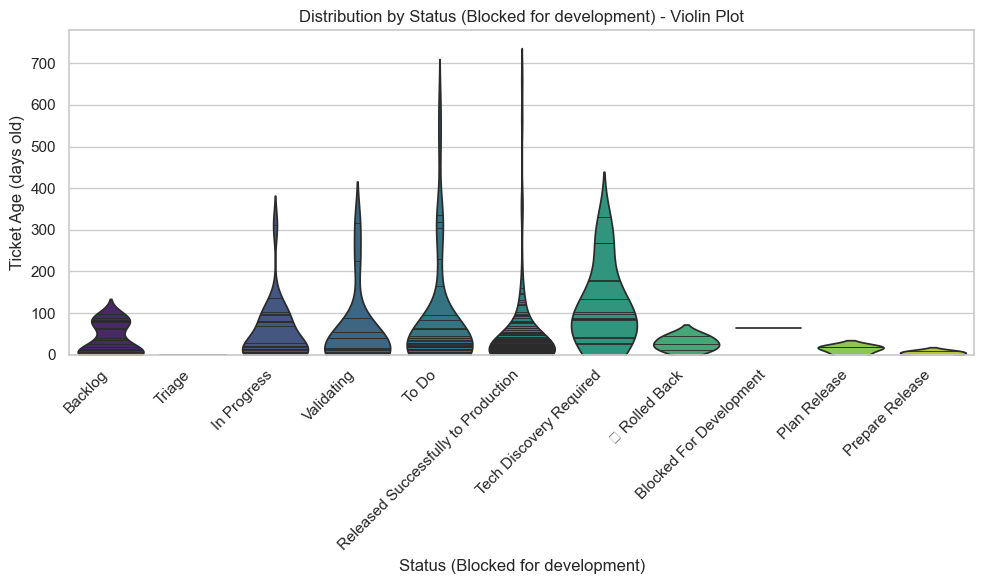

In [1252]:
# --- Alternative: Violin Plot ---
# If you prefer a violin plot (shows density distribution), uncomment the lines below:
plt.figure(figsize=(10, 6))
ax_violin = sns.violinplot(x='status', y='velocity_days', data=df[(df['status'] != 'Done') & (df['status'] != 'Will Not Do')], palette="viridis", inner="stick", hue='status') # 'inner' can be 'box', 'quartile', 'point', 'stick', None
plt.title(f'Distribution by Status ({status.capitalize()}) - Violin Plot')
plt.xlabel(f'Status ({status.capitalize()})')
plt.ylabel('Ticket Age (days old)')
plt.xticks(rotation=45, ha='right')
y_min, y_max = plt.ylim() # Get current y-axis limits
y_min = 0 # Set minimum y-axis limit to 0
#y_max = 400
plt.ylim(y_min, y_max) # Set y-axis limits to the current limits
plt.tight_layout()
plt.show()


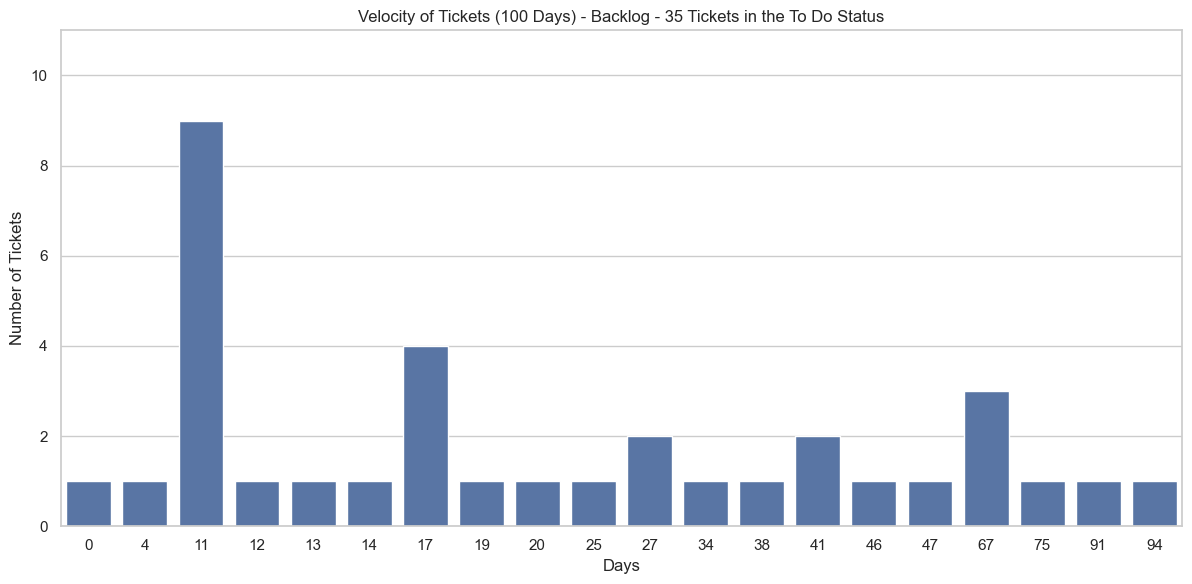

In [1129]:
# Import ticker from matplotlib
# from matplotlib import ticker

# Convert the 'velocity' column to timedelta if not already in that format
#df_issues['velocity'] = pd.to_timedelta(df_issues['velocity'], errors='coerce')

df_velocity = df_issues.copy()
# Now you can safely use the .dt accessor
df = df_velocity[df_velocity['days_old'] <= 100].copy() # Filter out NaT values
df = df[df['status'] == 'To Do'] # Filter out NaT values
#df = df[df['status'] != 'Done'] # Filter out NaT values
#df = df[df['status'] != 'Will Not Do'] # Filter out NaT values
#df = df[df['status'] != 'In Progress'] # Filter out NaT values
#df = df[df['status'] != 'In Review'] # Filter out NaT values
#df = df[df['status'] != 'To Do'] # Filter out NaT values
#df = df[df['status'] != 'Backlog'] # Filter out NaT values
#df = df[df['status'] != 'In Analysis'] # Filter out NaT values
#df = df[df['status'] != 'In Development'] # Filter out NaT values
#df = df[df['status'] != 'In Test'] # Filter out NaT values
#df = df[df['status'] != 'In QA'] # Filter out NaT values
#df = df[df['status'] != 'In UAT'] # Filter out NaT values
#df = df[df['status'] != 'In Deployment'] # Filter out NaT values
#df = df[df['status'] != 'In Production'] # Filter out NaT values
#df = df[df['status'] != 'In Review'] # Filter out NaT values
#df = df[df['status'] != 'In Verification'] # Filter out NaT values
#df = df[df['status'] != 'In Validation'] # Filter out NaT values
#df = df[df['status'] != 'In Release'] # Filter out NaT values
#df = df[df['status'] != 'In Staging'] # Filter out NaT values
#df = df[df['status'] != 'In Pre-Production'] # Filter out NaT values
#df = df[df['status'] != 'In Production'] # Filter out NaT values
#df['velocity'].dt.days
#df['velocity'].dt.days.value_counts()
#df['velocity'].dt.days.value_counts().sort_index()
# Plotting the velocity of issues
plt.figure(figsize=(12, 6))
#sns.barplot(x=df['velocity'].dt.days.value_counts().sort_index().index,
#            y=df['velocity'].dt.days.value_counts().sort_index().values
#            ) # Filter out NaT values
sns.barplot(x=df['days_old'].value_counts().sort_index().index,
            y=df['days_old'].value_counts().sort_index().values
            ) # Filter out NaT values
plt.title('Velocity of Tickets (100 Days) - Backlog - ' + str(df['days_old'].value_counts().sum()) + ' Tickets in the To Do Status')
plt.xlabel('Days')
plt.ylabel('Number of Tickets')
plt.tight_layout()
#plt.axhline(y=df['velocity'].dt.days.value_counts().sort_index().mean(), color='r', linestyle='--', label='Mean Velocity')
plt.ylim(0, df['days_old'].value_counts().sort_index().max() + 2) # Set y-axis limits to the current limits
from matplotlib.ticker import MultipleLocator
# Set the step size for y-axis ticks
plt.gca().yaxis.set_major_locator(MultipleLocator(2))
plt.show()
#print(df['velocity_days'].value_counts().sum())
#print(df.shape)

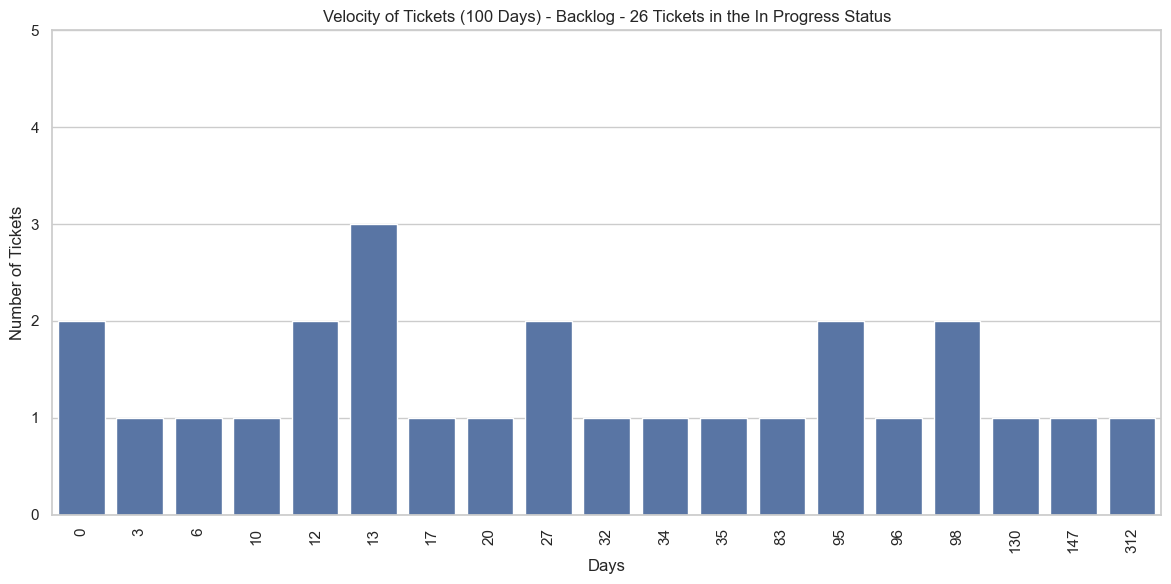

In [1130]:
df_velocity = df_issues.copy()
# Now you can safely use the .dt accessor
df = df_velocity[df_velocity['days_old'] <= 400].copy() # Filter out NaT values
#df = df[df['status'] == 'To Do'] # Filter out NaT values
#df = df[df['status'] != 'Done'] # Filter out NaT values
#df = df[df['status'] != 'Will Not Do'] # Filter out NaT values
df = df[df['status'] == 'In Progress'] # Filter out NaT values
#df = df[df['status'] != 'In Review'] # Filter out NaT values
#df = df[df['status'] != 'To Do'] # Filter out NaT values
#df = df[df['status'] != 'Backlog'] # Filter out NaT values
#df = df[df['status'] != 'In Analysis'] # Filter out NaT values
#df = df[df['status'] != 'In Development'] # Filter out NaT values
#df = df[df['status'] != 'In Test'] # Filter out NaT values
#df = df[df['status'] != 'In QA'] # Filter out NaT values
#df = df[df['status'] != 'In UAT'] # Filter out NaT values
#df = df[df['status'] != 'In Deployment'] # Filter out NaT values
#df = df[df['status'] != 'In Production'] # Filter out NaT values
#df = df[df['status'] != 'In Review'] # Filter out NaT values
#df = df[df['status'] != 'In Verification'] # Filter out NaT values
#df = df[df['status'] != 'In Validation'] # Filter out NaT values
#df = df[df['status'] != 'In Release'] # Filter out NaT values
#df = df[df['status'] != 'In Staging'] # Filter out NaT values
#df = df[df['status'] != 'In Pre-Production'] # Filter out NaT values
#df = df[df['status'] != 'In Production'] # Filter out NaT values
#df['velocity'].dt.days
#df['velocity'].dt.days.value_counts()
#df['velocity'].dt.days.value_counts().sort_index()
# Plotting the velocity of issues
plt.figure(figsize=(12, 6))
#sns.barplot(x=df['velocity'].dt.days.value_counts().sort_index().index,
#            y=df['velocity'].dt.days.value_counts().sort_index().values
#            ) # Filter out NaT values

sns.barplot(x=df['days_old'].value_counts().sort_index().index,
            y=df['days_old'].value_counts().sort_index().values
            ) # Filter out NaT values
plt.title('Velocity of Tickets (100 Days) - Backlog - ' + str(df['days_old'].value_counts().sum()) + ' Tickets in the In Progress Status')
plt.xlabel('Days')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90) # Rotate x-axis labels if needed
plt.tight_layout()
#plt.axhline(y=df['velocity'].dt.days.value_counts().sort_index().mean(), color='r', linestyle='--', label='Mean Velocity')
plt.ylim(0, df['days_old'].value_counts().sort_index().max() + 2) # Set y-axis limits to the current limits
plt.show()
#print(df['velocity_days'].value_counts().sum())
#print(df.shape)

In [672]:
df_issues['priority_name'].value_counts().sort_values(ascending=False)

priority_name
None           4947
High            797
Medium          597
No Priority     586
Urgent          222
Low             185
P2 - Normal      12
P1 - Major        1
Name: count, dtype: int64

In [673]:
df_issues['status'].value_counts()

status
Done                       6161
Will Not Do                1033
Tech Discovery Required      77
In Progress                  19
Blocked                      16
On Hold                      15
To Do                        12
Validating                   11
Triage                        2
Resource Constrained          1
Name: count, dtype: int64

In [573]:
print(f"Finished fetching. Found {total_issues_processed} issues in total.")
print("\n--- Summary of Counts ---")
print("\nAssignee Counts:")
for assignee, count in assignee_counts.items():
    print(f"- {assignee}: {count}")
print("\nIssue Creator Counts:")
for creator, count in issue_creator_counts.items():
    print(f"- {creator}: {count}")
print("\nStatus Counts:")
for status, count in status_counts.items():
    print(f"- {status}: {count}")
print("\nIssue Type Counts:")
for issue_type, count in issue_type_counts.items():
    print(f"- {issue_type}: {count}")
print("\nScript finished.")

Finished fetching. Found 7342 issues in total.

--- Summary of Counts ---

Assignee Counts:
- Adam Shero: 284
- Adrien.Carlson: 1
- AkashD: 39
- Alex Wilson: 2
- Amy Van Hook: 2
- Andy Drake: 1
- Angel Cancio: 353
- Arjun Parajuli: 1
- Ben Bonora: 7
- Bolanle: 648
- Bryan Harris: 1
- Carlos Zuniga Ballestero: 3
- Christian Tragesser: 1
- Cris Stoddard: 1
- Cullen Philippson: 322
- Daniel Warshaw: 1
- Danish Sattar: 6
- Dan Shepard: 572
- David Caballero: 536
- David Caballero Miranda: 67
- David Wright: 1
- Dewayne Korth: 1
- Dwayne Steinway: 9
- Ed Colgan: 1
- Ella Arana: 1
- Eric Paul: 207
- Erin Fink: 38
- Fadi Elkhatib: 2
- Felix Curry: 1
- Nathan Carmine: 1
- Harold Wilson: 1
- Former user: 135
- Jon West: 6
- Chad: 30
- Kiran Yellamarthi: 7
- Hammad Daoud: 13
- hani.kanafani: 2
- Henry Wadsworth: 1
- James Brown: 6
- Jason Cox: 3
- Jeff Naparstek: 1
- Jeff Slutz: 2
- Jere Jones: 7
- Jeremy Chase: 40
- jeremy.williams: 1
- Jerry Hill: 1
- Jesse.Larson: 1
- Joel Flickinger: 68
- Jo

In [574]:
df_assignee = pd.DataFrame(assignee_counts.items(), columns=['Assignee', 'Count'])
df_assignee = df_assignee.sort_values(by='Count', ascending=False)
df_assignee.reset_index(drop=True, inplace=True)
print("\n--- Assignee Counts DataFrame ---")
df_assignee


--- Assignee Counts DataFrame ---


,Assignee,Count
0,Tom Terry,1091
1,Unassigned,756
2,Bolanle,648
3,Dan Shepard,572
4,David Caballero,536
...,...,...
84,Sherman Glass,1
85,stephen.smith,1
86,stephanie.barulic,1
87,Vincent Murr,1


## -- Distribution of Tickets per Assignee --

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_54513/4021496809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assignee', y='Count', data=df_assignee[df_assignee['Count'] > 50], palette='viridis')


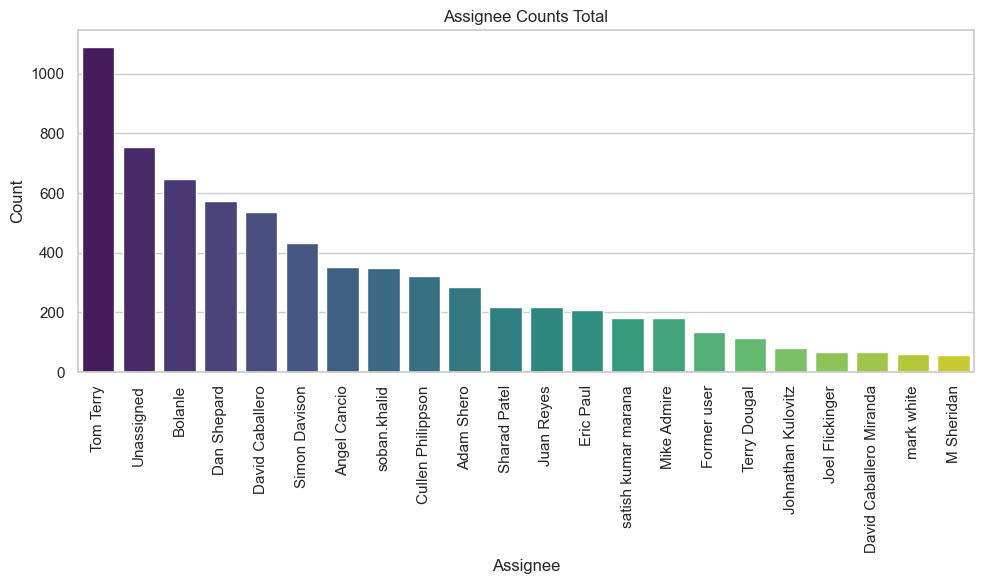

In [575]:
import seaborn as sns
# Set the seaborn style
sns.set(style="whitegrid")
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Assignee', y='Count', data=df_assignee[df_assignee['Count'] > 50], palette='viridis')
plt.title('Assignee Counts Total')
plt.xlabel('Assignee')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [576]:
df_issues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7342 entries, 0 to 7341
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   key                    7342 non-null   object                   
 1   id                     7342 non-null   object                   
 2   summary                7342 non-null   object                   
 3   status                 7342 non-null   object                   
 4   issuetype              7342 non-null   object                   
 5   creator_name           7342 non-null   object                   
 6   assignee_name          7342 non-null   object                   
 7   created                7342 non-null   object                   
 8   updated                7342 non-null   object                   
 9   project_name           7342 non-null   object                   
 10  project_id             7342 non-null   object   

In [577]:
start_year = 2000
total_per_assignee_df = df_issues[df_issues['year_updated'] >= start_year ].groupby(['year_updated', 'month_updated','assignee_name']).agg(Total=('assignee_name', 'count')).sort_values(['year_updated', 'month_updated'])




In [578]:
total_per_assignee_df

Total
year_updated month_updated assignee_name             
2019         1             Former user              1
                           Unassigned               2
             2             Chad                     4
                           Former user              8
                           Unassigned               8
...                                               ...
2025         5             Terry Dougal            26
                           Tom Terry               29
                           Unassigned              74
                           satish kumar marana      9
                           soban.khalid             1

[896 rows x 1 columns]

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_54513/520573457.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


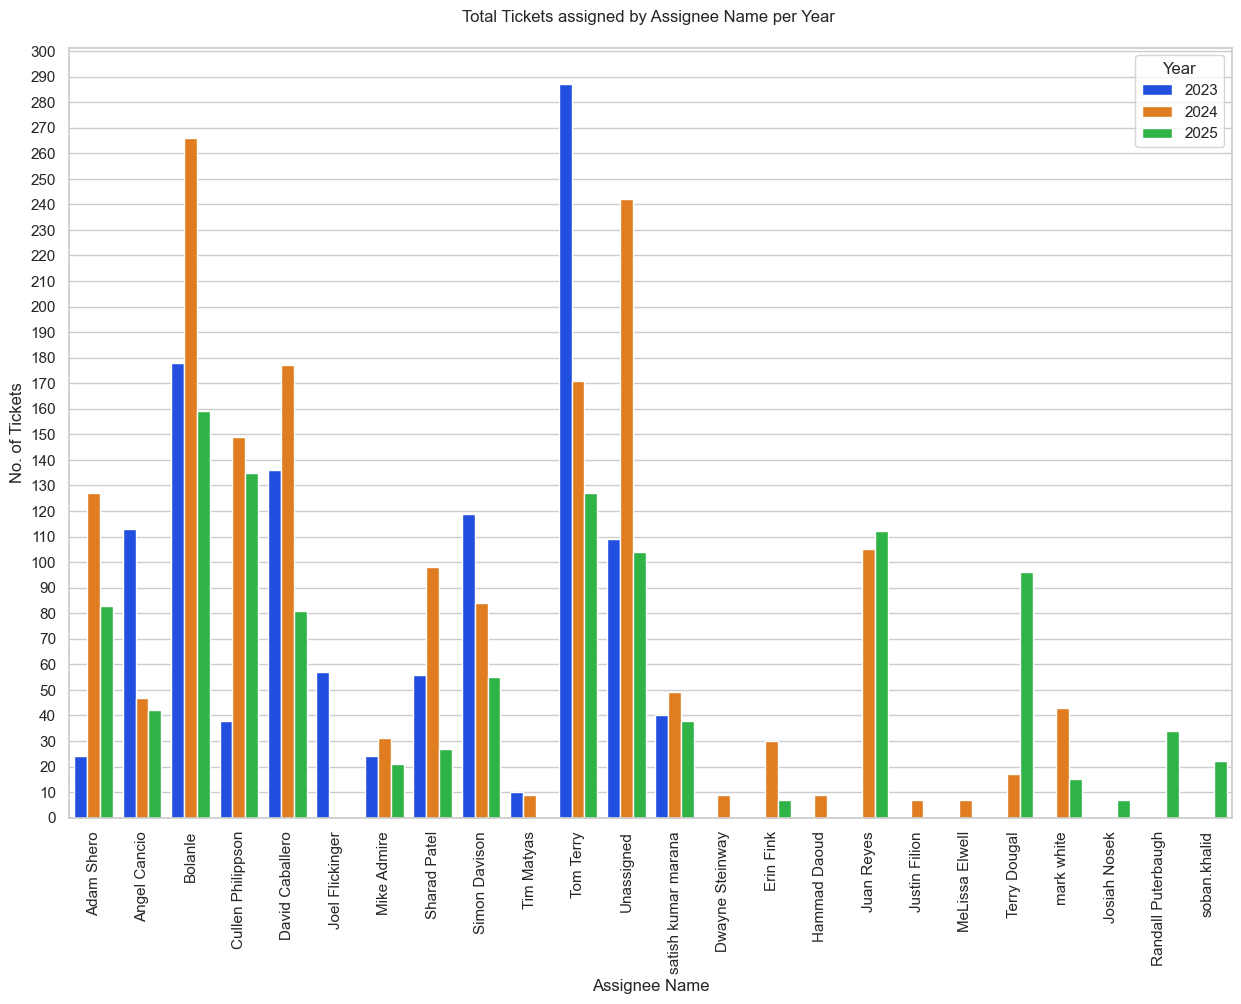

In [579]:
start_year = 2023
total_per_assignee_df = df_issues[df_issues['year_updated'] >= start_year ].groupby(['year_updated','assignee_name']).agg(Total=('assignee_name', 'count')).sort_values(['year_updated'])
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="assignee_name", y="Total", data=total_per_assignee_df[(total_per_assignee_df['Total'] > 5) & (total_per_assignee_df['Total'] < 300)],
            hue='year_updated', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Assignee Name")
ax.set_ylabel("No. of Tickets")
#ax.set_title("AWS Total Accumulated Cost by Services over " + "${:,.2f}".format(int(anual_cost)) + "\n")
ax.set_title("Total Tickets assigned by Assignee Name per Year \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(int(x))))
ax.legend(title='Year', loc='upper right')
#plt.savefig("AWS Yearly Cost by Service")

/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_54513/3753287584.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')


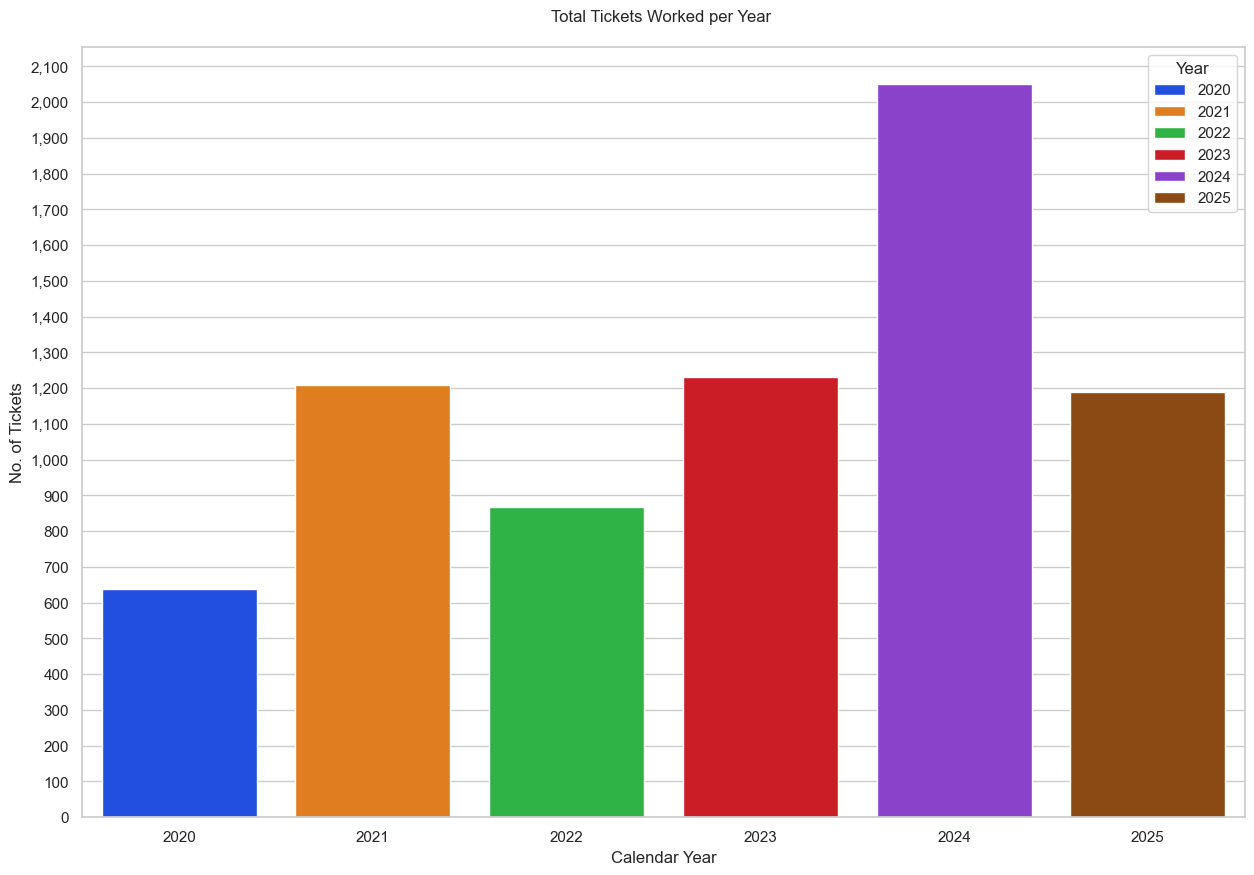

In [580]:
start_year = 2020
total_per_year_df = df_issues[df_issues['year_updated'] >= start_year ].groupby(['year_updated']).agg(Total=('year_updated', 'count')).sort_values(['year_updated'])
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x="year_updated", y="Total", data=total_per_year_df,
            hue='year_updated', legend=True, color='green',palette='bright')


# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xlabel("Calendar Year")
ax.set_ylabel("No. of Tickets")
#ax.set_title("AWS Total Accumulated Cost by Services over " + "${:,.2f}".format(int(anual_cost)) + "\n")
ax.set_title("Total Tickets Worked per Year \n")
#plt.xticks(rotation=90) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
#ax.set_xticklabels(labels=services_df['Service'],rotation=45)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_locator(MultipleLocator(100))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(int(x))))
ax.legend(title='Year', loc='upper right')
#plt.savefig("AWS Yearly Cost by Service")

In [485]:
df_issues[(df_issues['status'] == 'In Progress') & (df_issues['days_old'] < 365)]

,key,id,summary,status,issuetype,creator_name,assignee_name,created,updated,project_name,...,today,days_old,year_updated,month_updated,year_created,month_created,last_updated_days,velocity,velocity_days,velocity_hours
0,DEVOPS-7651,165214,[DAC | Audio Licensing | Load/Delivery] Config...,In Progress,Story,Adam Shero,Adam Shero,2025-05-19 09:37:52.323000-06:00,2025-05-21 15:12:09.867000-06:00,DevOps,...,2025-05-21 10:53:08.330681-06:00,2,2025,5,2025,5,0,2 days 05:34:17.544000,2,53.571540
329,DEVOPS-7619,164904,[Amperwave Webhook Service][DEV] Assist in set...,In Progress,Task,Johnathan Kulovitz,Angel Cancio,2025-05-12 14:30:12.085000-06:00,2025-05-21 15:33:01.075000-06:00,DevOps,...,2025-05-21 10:53:10.224956-06:00,8,2025,5,2025,5,0,9 days 01:02:48.990000,9,217.046942
331,DEVOPS-6891,159391,Setting up a trusted relationship between Snow...,In Progress,Story,Mrinal Kaustuv,Angel Cancio,NaT,2025-05-21 08:31:15.017000-06:00,DevOps,...,2025-05-21 10:53:10.235198-06:00,110,2025,5,2025,1,0,110 days 00:06:29.282000,110,2640.108134
1351,DEVOPS-6519,155909,[Nonprod] Google Spanner Access,In Progress,Story,Seneca Widvey,Cullen Philippson,2024-10-11 11:42:39.258000-06:00,2025-05-20 11:02:00.211000-06:00,DevOps,...,2025-05-21 10:53:15.741832-06:00,221,2025,5,2024,10,0,220 days 23:19:20.953000,220,5303.322487
1381,DEVOPS-6934,159685,[AW] Clarity Demo Enviroment,In Progress,Story,Jason Cox,Cullen Philippson,NaT,2025-05-15 10:43:15.783000-06:00,DevOps,...,2025-05-21 10:53:15.890266-06:00,99,2025,5,2025,2,6,93 days 23:22:32.938000,93,2255.375816
2275,DEVOPS-7575,164544,EKS Cluster module upgrade - recommendation-no...,In Progress,Task,David Caballero,David Caballero,2025-05-05 16:42:04.702000-06:00,2025-05-13 12:49:03.481000-06:00,DevOps,...,2025-05-21 10:53:20.290703-06:00,15,2025,5,2025,5,7,7 days 20:06:58.779000,7,188.116327
3534,DEVOPS-7658,165287,prj-era-interim-prod-f956: Unable to save queries,In Progress,Task,Zendesk Support for Jira,Juan Reyes,2025-05-20 13:18:16.589000-06:00,2025-05-21 15:10:23.073000-06:00,DevOps,...,2025-05-21 10:53:26.602057-06:00,0,2025,5,2025,5,0,1 days 01:52:06.484000,1,25.868468
3852,DEVOPS-7082,160278,Radio.com Moves,In Progress,Feature,MeLissa Elwell,Mike Admire,NaT,2025-05-15 09:05:13.665000-06:00,DevOps,...,2025-05-21 10:53:28.176877-06:00,82,2025,5,2025,2,6,76 days 17:37:11.918000,76,1841.619977
3853,DEVOPS-7564,164438,[Listener Profile] Infra for identifying regis...,In Progress,Feature,Joe Parlett,Mike Admire,2025-05-02 13:23:37.056000-06:00,2025-05-15 08:55:50.675000-06:00,DevOps,...,2025-05-21 10:53:28.181416-06:00,18,2025,5,2025,5,6,12 days 19:32:13.619000,12,307.537116
3854,DEVOPS-6975,159845,Listener Profile Infrastructure,In Progress,Feature,Vincent Ma,Mike Admire,NaT,2025-05-14 10:39:01.781000-06:00,DevOps,...,2025-05-21 10:53:28.186495-06:00,96,2025,5,2025,2,7,89 days 19:55:47.195000,89,2155.929776


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_54513/1113691039.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='assignee_name', y='days_old', data=df_issues[(df_issues['status'] == 'In Progress') & (df_issues['days_old'] < 300)], palette='viridis')


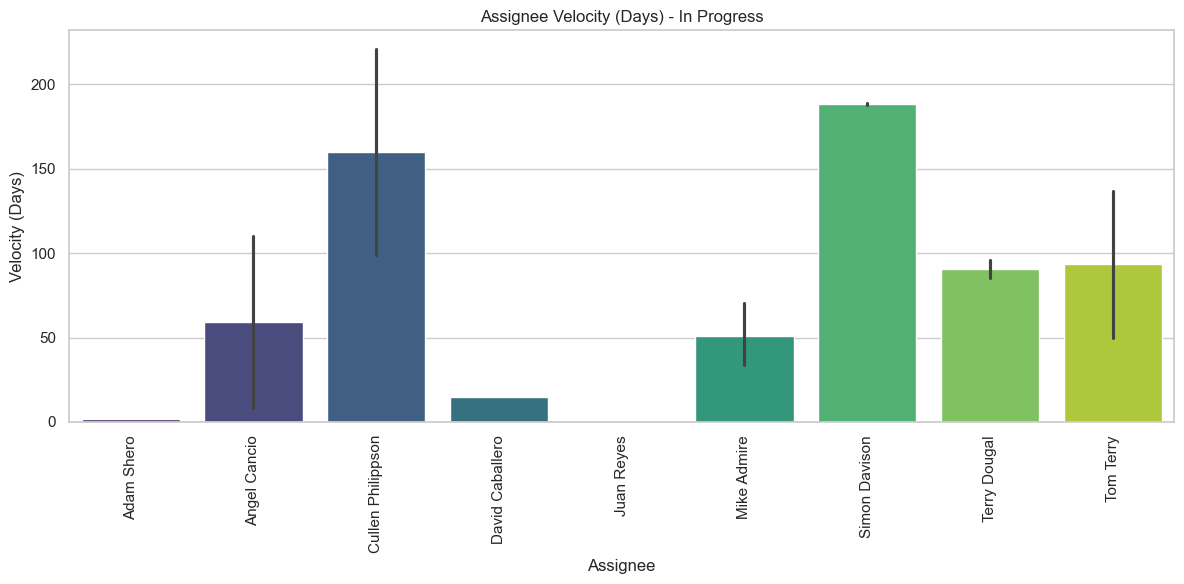

In [486]:
#data = df_issues.groupby(['status','assignee_name'])['days_old'].mean().sort_values(ascending=False).copy()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6)) 
sns.barplot(x='assignee_name', y='days_old', data=df_issues[(df_issues['status'] == 'In Progress') & (df_issues['days_old'] < 300)], palette='viridis')
plt.title('Assignee Velocity (Days) - In Progress')
plt.xlabel('Assignee')
plt.ylabel('Velocity (Days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [44]:
df_creator = pd.DataFrame(issue_creator_counts.items(), columns=['creator', 'Count'])
df_creator = df_creator.sort_values(by='Count', ascending=False)
df_creator.reset_index(drop=True, inplace=True)
print("\n--- creator Counts DataFrame ---")
df_creator



--- creator Counts DataFrame ---


,creator,Count
0,David Caballero,448
1,Adam Shero,348
2,Former user,325
3,Zendesk Support for Jira,314
4,Tom Terry,213
...,...,...
306,Rob McClain,1
307,Tammy LaTier,1
308,Joshua Pappalardo,1
309,tom.schairer,1


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_19948/2755360980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='creator', y='Count', data=df_creator[df_creator['Count'] > 50], palette='viridis')


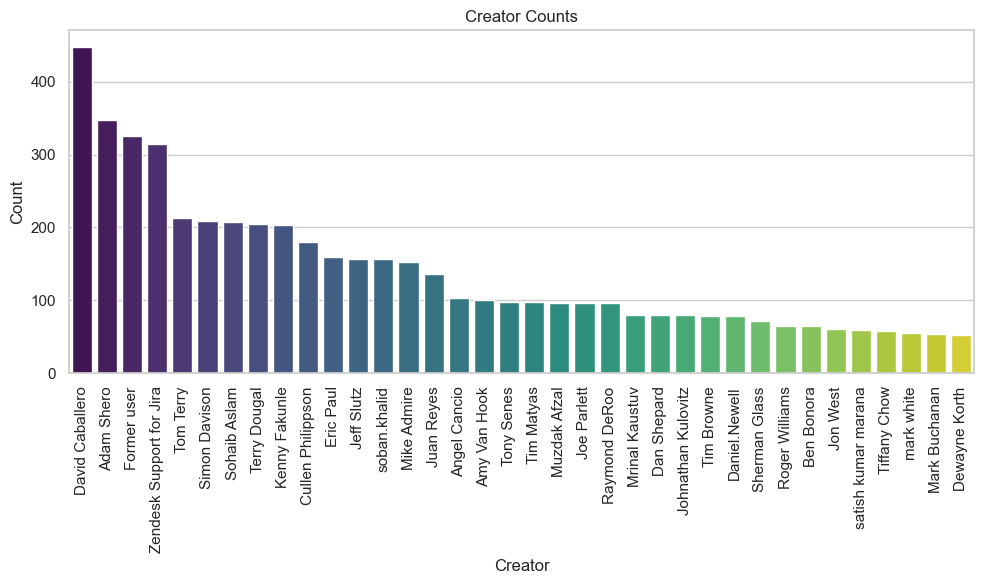

In [45]:
import seaborn as sns
# Set the seaborn style
sns.set(style="whitegrid")
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='creator', y='Count', data=df_creator[df_creator['Count'] > 50], palette='viridis')
plt.title('Creator Counts')
plt.xlabel('Creator')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [47]:
df_issue_type = pd.DataFrame(issue_type_counts.items(), columns=['Issue Type', 'Count'])
df_issue_type = df_issue_type.sort_values(by='Count', ascending=False)
df_issue_type.reset_index(drop=True, inplace=True)
print("\n--- Issue Type Counts DataFrame ---")
df_issue_type


--- Issue Type Counts DataFrame ---


,Issue Type,Count
0,Task,4251
1,Story,1796
2,Support,406
3,Feature,369
4,Bug,233
5,Sub-task,149
6,Legend,21
7,Post Mortem,21
8,Incident,19
9,Change,19


/var/folders/bc/rbbb9nc96zd3bj2l2mq3klq00000gp/T/ipykernel_19948/3259829271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Issue Type', y='Count', data=df_issue_type[df_issue_type['Count'] > 50], palette='viridis')


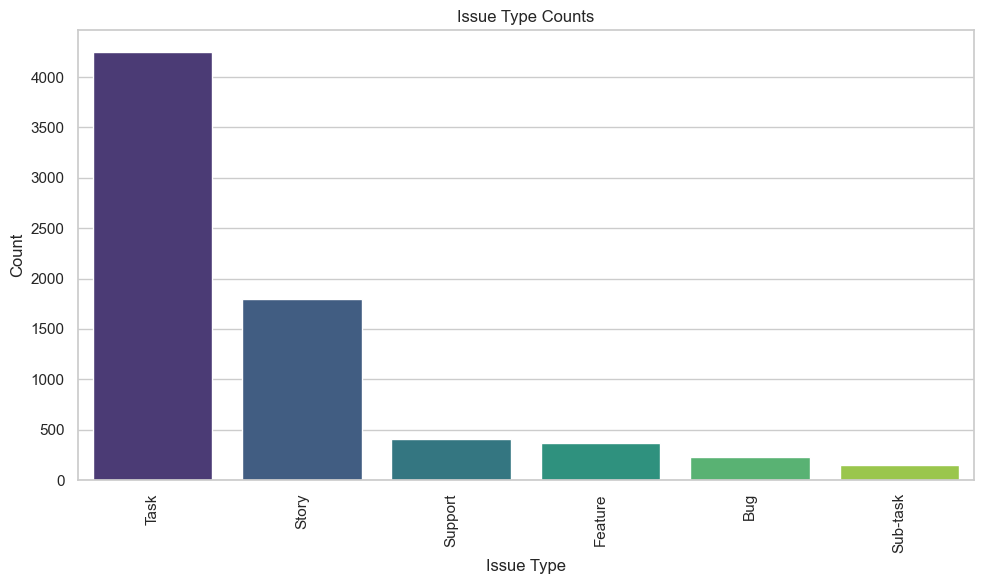

In [48]:
import seaborn as sns
# Set the seaborn style
sns.set(style="whitegrid")
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Issue Type', y='Count', data=df_issue_type[df_issue_type['Count'] > 50], palette='viridis')
plt.title('Issue Type Counts')
plt.xlabel('Issue Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## -- Custom Fields in Jira --

In [47]:
print("Fetching field definitions...")
all_fields = jira.fields()
custom_field_map = {field['id']: field['name'] for field in all_fields if field['custom']}
print("Field definitions fetched.")

Fetching field definitions...
Field definitions fetched.


In [48]:
custom_field_map

{'customfield_11720': 'Idea archived on',
 'customfield_10872': 'Mobile Platform',
 'customfield_10873': 'Mobile Device Model',
 'customfield_10500': 'Team',
 'customfield_11719': 'Idea archived by',
 'customfield_11718': 'Idea archived',
 'customfield_10980': 'Planning Notes',
 'customfield_10981': 'Reference',
 'customfield_10862': 'QA',
 'customfield_10975': 'Issues to be Load Tested',
 'customfield_10976': 'Load Testing',
 'customfield_10977': 'Request Type',
 'customfield_10978': 'Request Type',
 'customfield_10979': 'Fixed Version',
 'customfield_10970': 'Defect Severity and Environment',
 'customfield_10971': 'DevOps',
 'customfield_10972': 'Program Manager',
 'customfield_10962': 'Measurement & Analysis Plan',
 'customfield_10600': 'Organizations',
 'customfield_10963': 'Resources',
 'customfield_10965': 'Assumptions and Constraints',
 'customfield_10966': 'Risks and Mitigations',
 'customfield_10967': 'Champion',
 'customfield_10968': 'Estimated Size',
 'customfield_10848': 'I

In [49]:

    # --- Process Each Issue ---
for issue in issues_iterator[:10]:
        print(f"\n--- Issue: {issue.key} ({issue.fields.summary}) ---")
        custom_fields_data = {}

        # Access the raw field data which reliably contains custom fields
        # The 'issue.fields' object might not dynamically populate all custom fields
        # as attributes unless explicitly requested or configured.
        raw_fields = issue.raw.get('fields', {})

        for field_id, value in raw_fields.items():
            if field_id.startswith('customfield_'):
                # Get the human-readable name if available
                field_name = custom_field_map.get(field_id, field_id) # Fallback to ID if name not found
                custom_fields_data[field_name] = value
                # You can also store the ID if needed:
                # custom_fields_data[field_id] = {'name': field_name, 'value': value}


        if custom_fields_data:
            print("Custom Fields:")
            for name, value in custom_fields_data.items():
                 # Values can be complex (dicts, lists, strings, numbers, None)
                 # Handle potential None values gracefully
                print(f"  - {name}: {value if value is not None else 'N/A'}")
        else:
            print("  No custom fields found or retrieved for this issue.")



--- Issue: DEVOPS-7529 ([Nonprod] (Audio Licensing Catalog) Setup AWS DataSync) ---
  No custom fields found or retrieved for this issue.

--- Issue: DEVOPS-7270 (A2 user-token-shared nonprod: migrate RDS module) ---
  No custom fields found or retrieved for this issue.

--- Issue: DEVOPS-7174 ([Nonprod] CoreV2 Elasticache Migration) ---
  No custom fields found or retrieved for this issue.

--- Issue: DEVOPS-7373 ([Nonprod] Configure Kubeflow Templates Pipelines) ---
  No custom fields found or retrieved for this issue.

--- Issue: DEVOPS-7451 (RockSteady - QA configuration Updates) ---
  No custom fields found or retrieved for this issue.

--- Issue: DEVOPS-7469 ([Nonprod] (Audio Licensing Catalog) Transfer Bucket Objects) ---
  No custom fields found or retrieved for this issue.

--- Issue: DEVOPS-7463 ([Nonprod] (Audio Licensing Catalog) Create GCS Buckets) ---
  No custom fields found or retrieved for this issue.

--- Issue: DEVOPS-7470 ([Nonprod] (Audio Licensing Catalog) GCP to